## 🏆 비디오게임 시장분석 및 다음 분기 게임 출시를 위한 인사이트 🏆 


<img src="https://www.callofduty.com/content/dam/atvi/callofduty/cod-touchui/hub/meta-imgs/vg-meta-image.jpg" width="300">
<img src='https://cdn1.epicgames.com/0584d2013f0149a791e7b9bad0eec102/offer/GTAV_EGS_Artwork_2560x1440_Landscaped%20Store-2560x1440-79155f950f32c9790073feaccae570fb.jpg', width='300'>
<img src="https://itigic.com/wp-content/uploads/2019/12/mario-cart-tour.jpg?ezimgfmt=ng%3Awebp%2Fngcb2%2Frs%3Adevice%2Frscb2-2" width="300">
<img src='https://images.squarespace-cdn.com/content/v1/56d725b88a65e2c48c079abf/1476318644366-CLC6IPPIC7Z2O08JR5R4/PokemonOmegaRubyAlphaSapphire_3DS_Preview.jpg?format=2500w', width='300'>

## Inspiration
1. 지역에 따라 선호하는 게임 장르가 있는가?
2. 지역에 따라 선호하는 플랫폼이 무엇인가?
3. 연도별 게임 장르의 트렌드가 있는가?
4. 연도별 플랫폼의 트렌드가 있는가?
5. 연도별 게임회사의 트렌드가 있는가?
6. 출고량이 높은 게임에는 어떤 특징이 있는가?
7. 출고량이 높은 게임의 제작사에는 어떤 특징이 있는가?  
#### => 결론) 다음 분기에 어떤 게임을 어떻게 출시해야 유리한가?

In [104]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_1samp, ttest_ind, chisquare, chi2_contingency,f_oneway
import copy
import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rc('font', family='NanumBarunGothic')
plt.style.use('ggplot')
plt.rcParams['axes.unicode_minus'] = False

In [105]:
games = pd.read_csv('vgames2.csv', index_col=0)

games.sort_values(by='Year', ascending=True)   #Publisher에 'Unknown'인 값들이 보임

Name Platform  Year     Genre           Publisher  \
9277   Trade & Battle: Card Hero       GB   0.0  Strategy            Nintendo   
16395              Point Blank 3       PS   0.0   Shooter  Namco Bandai Games   
14667                  Strider 2       PS   0.0  Platform  Virgin Interactive   
2250                  SplashDown      PS2   1.0    Racing               Atari   
8682          NCAA Football 2002      PS2   1.0    Sports     Electronic Arts   
...                          ...      ...   ...       ...                 ...   
16241              Freaky Flyers       GC   NaN    Racing             Unknown   
16276             Space Invaders     2600   NaN   Shooter               Atari   
16279              Madden NFL 11      Wii   NaN    Sports             Unknown   
16426             Yoostar on MTV     X360   NaN      Misc             Unknown   
16433                Bejeweled 3     X360   NaN    Puzzle             Unknown   

      NA_Sales EU_Sales JP_Sales Other_Sales  
9277         0        0      0.2           0  
16395     0.01     0.01        0           0  
14667     0.05     0.03        0        0.01  
2250      0.34     0.27        0        0.09  
8682      0.77      0.6        0         0.2  
...        ...      ...      ...         ...  
16241     0.01        0        0           0  
16276     2.36     0.14       0M        0.03  
16279      0.7        0        0         50K  
16426     0.06        0        0           0  
16433     0.13        0        0        0.01  

[16598 rows x 9 columns]

In [106]:
# NA / EU / JP / Other 출고량 형변환&단위변환(백만단위로 통일)
for region in ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']:
    numeric = []
    for i in games[region]:
        if i[-1] == 'M':
            numeric.append(round(float(i[:-1]), 2))
        elif i[-1] == 'K':
            numeric.append(round(float(i[:-1])/1000, 2))
        else:
            numeric.append(round(float(i), 2))
    games[region] = numeric
    
games.head()

Name Platform    Year      Genre  \
1                    Candace Kane's Candy Factory       DS  2008.0     Action   
2                                  The Munchables      Wii  2009.0     Action   
3  Otome wa Oanesama Boku ni Koi Shiteru Portable      PSP  2010.0  Adventure   
4                Deal or No Deal: Special Edition       DS  2010.0       Misc   
5       Ben 10 Ultimate Alien: Cosmic Destruction      PS3  2010.0   Platform   

            Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  
1           Destineer      0.04      0.00      0.00         0.00  
2  Namco Bandai Games      0.17      0.00      0.00         0.01  
3           Alchemist      0.00      0.00      0.02         0.00  
4           Zoo Games      0.04      0.00      0.00         0.00  
5         D3Publisher      0.12      0.09      0.00         0.04

In [107]:
#총 판매량을 나타내는 column 더해주기
games['Total_Sales'] = games['NA_Sales'] + games['EU_Sales'] + games['JP_Sales'] + games['Other_Sales']
games = games.reset_index().loc[:, 'Name':'Total_Sales']

games.head()

Name Platform    Year      Genre  \
0                    Candace Kane's Candy Factory       DS  2008.0     Action   
1                                  The Munchables      Wii  2009.0     Action   
2  Otome wa Oanesama Boku ni Koi Shiteru Portable      PSP  2010.0  Adventure   
3                Deal or No Deal: Special Edition       DS  2010.0       Misc   
4       Ben 10 Ultimate Alien: Cosmic Destruction      PS3  2010.0   Platform   

            Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  Total_Sales  
0           Destineer      0.04      0.00      0.00         0.00         0.04  
1  Namco Bandai Games      0.17      0.00      0.00         0.01         0.18  
2           Alchemist      0.00      0.00      0.02         0.00         0.02  
3           Zoo Games      0.04      0.00      0.00         0.00         0.04  
4         D3Publisher      0.12      0.09      0.00         0.04         0.25

## 결측치 / Unknown 데이터 처리

In [108]:
#제조사 unknown인 데이터들 확인
games[games.Publisher=='Unknown'].sort_values(by='Total_Sales', ascending=False)

Name Platform    Year         Genre  \
9486    Gran Turismo Concept 2001 Tokyo      PS2  2001.0        Racing   
13752               NASCAR Thunder 2003      PS2     NaN        Racing   
14585                      Suikoden III      PS2     NaN  Role-Playing   
6118                   Wheel of Fortune      PS2     NaN          Misc   
8836       Teenage Mutant Ninja Turtles      GBA  2003.0        Action   
...                                 ...      ...     ...           ...   
9648   Dark Parables: The Exiled Prince       PC  2011.0        Puzzle   
9855                          Fit & Fun      Wii  2011.0        Sports   
10351    Shitsuji ga Aruji o Erabu Toki      PSV  2016.0     Adventure   
11711       Hakuouki: Shinsengumi Kitan      PS3     NaN     Adventure   
16500          The Dark Hills of Cherai       PC  2009.0        Puzzle   

      Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  Total_Sales  
9486    Unknown      0.00      1.10      0.42         0.33         1.85  
13752   Unknown      0.60      0.46      0.00         0.16         1.22  
14585   Unknown      0.29      0.23      0.38         0.08         0.98  
6118    Unknown      0.47      0.36      0.00         0.12         0.95  
8836    Unknown      0.67      0.25      0.00         0.02         0.94  
...         ...       ...       ...       ...          ...          ...  
9648    Unknown      0.00      0.01      0.00         0.00         0.01  
9855    Unknown      0.00      0.01      0.00         0.00         0.01  
10351   Unknown      0.00      0.00      0.01         0.00         0.01  
11711   Unknown      0.01      0.00      0.00         0.00         0.01  
16500   Unknown      0.00      0.01      0.00         0.00         0.01  

[203 rows x 10 columns]

In [109]:
games[games.Total_Sales > 1.85].shape[0]
#제조사가 unknown인 데이터 중 가장 많이 팔린 게임도 상위 933위에 들지 못할 정도이므로,
#위 데이터들은 삭제해도 무방해 보임

933

In [110]:
print('제거 전 :', games.shape)
games.drop(games[games.Publisher == 'Unknown'].index, inplace=True)
print('제거 후 :', games.shape)

제거 전 : (16598, 10)
제거 후 : (16395, 10)


In [111]:
games.reset_index(drop=True, inplace=True)

In [112]:
#결측치 확인
games.isna().sum()

Name             0
Platform         0
Year           168
Genre           49
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
Total_Sales      0
dtype: int64

In [113]:
#Year가 결측치인 데이터 확인
games[games['Year'].isna()].sort_values(by='Total_Sales', ascending=False).head(10)

Name Platform  Year      Genre  \
6865                               Madden NFL 2004      PS2   NaN     Sports   
10835                             FIFA Soccer 2004      PS2   NaN     Sports   
3309                    LEGO Batman: The Videogame      Wii   NaN     Action   
3523                    wwe Smackdown vs. Raw 2006      PS2   NaN   Fighting   
16078                               Space Invaders     2600   NaN    Shooter   
30                                       Rock Band     X360   NaN       Misc   
13170     Frogger's Adventures: Temple of the Frog      GBA   NaN  Adventure   
8423   LEGO Indiana Jones: The Original Adventures      Wii   NaN     Action   
2109                                Call of Duty 3      Wii   NaN    Shooter   
4132                                     Rock Band      Wii   NaN       Misc   

                                    Publisher  NA_Sales  EU_Sales  JP_Sales  \
6865                          Electronic Arts      4.26      0.26      0.01   
10835                         Electronic Arts      0.59      2.36      0.04   
3309   Warner Bros. Interactive Entertainment      1.86      1.02      0.00   
3523                                      NaN      1.57      1.02      0.00   
16078                                   Atari      2.36      0.14      0.00   
30                            Electronic Arts      1.93      0.34      0.00   
13170            Konami Digital Entertainment      2.15      0.18      0.00   
8423                                LucasArts      1.54      0.63      0.00   
2109                               Activision      1.19      0.84      0.00   
4132                                MTV Games      1.35      0.56      0.00   

       Other_Sales  Total_Sales  
6865          0.71         5.24  
10835         0.51         3.50  
3309          0.29         3.17  
3523          0.41         3.00  
16078         0.03         2.53  
30            0.21         2.48  
13170         0.07         2.40  
8423          0.22         2.39  
2109          0.23         2.26  
4132          0.20         2.11

In [114]:
games[games.Total_Sales >= 5.24].shape
#상위 179위로, 제거하지 않고 분석에 이용하기로 함

(179, 10)

In [115]:
#구글링 통해 각 게임의 출시년도를 알아내어 직접 입력
games.iloc[6865, 2] = 2003
games.iloc[10965, 2] = 2003
games.iloc[3347, 2] = 2008
games.iloc[3562, 2] = 2005
games.iloc[16275, 2] = 1978
games.iloc[30, 2] = 2008
games.iloc[4132, 2] = 2008
games.iloc[10648, 2] = 2008
games.iloc[12706, 2] = 2008
games.iloc[13170, 2] = 2001
games.iloc[8423, 2] = 2008
games.iloc[2109, 2] = 2006
games.iloc[4132, 2] = 2008

In [116]:
#Genre가 결측치인 데이터 확인
games[games['Genre'].isna()].sort_values(by='Total_Sales', ascending=False).head(10)

Name Platform    Year Genre  \
1952            Pokemon X/Pokemon Y      3DS  2013.0   NaN   
4544                      Wii Party      Wii  2010.0   NaN   
9373              Final Fantasy XII      PS2  2006.0   NaN   
12185            Onimusha: Warlords      PS2  2001.0   NaN   
15339                    Bloodborne      PS4  2015.0   NaN   
16384  Need for Speed Underground 2       XB  2004.0   NaN   
5600                   Chrono Cross       PS  1999.0   NaN   
3887              MVP Baseball 2004      PS2  2004.0   NaN   
10932                      Yakuza 3      PS3  2009.0   NaN   
11362                      F-Zero X      N64  1998.0   NaN   

                         Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
1952                      Nintendo      5.17      4.05      4.34         0.79   
4544                      Nintendo      1.79      3.53      2.49         0.68   
9373                   Square Enix      1.88      0.00      2.33         1.74   
12185           Virgin Interactive      0.99      0.48      1.09         0.14   
15339  Sony Computer Entertainment      1.00      0.76      0.26         0.36   
16384              Electronic Arts      1.38      0.80      0.00         0.10   
5600                    SquareSoft      0.62      0.42      0.69         0.12   
3887               Electronic Arts      1.10      0.06      0.00         0.18   
10932                         Sega      0.21      0.21      0.62         0.08   
11362                     Nintendo      0.45      0.33      0.29         0.03   

       Total_Sales  
1952         14.35  
4544          8.49  
9373          5.95  
12185         2.70  
15339         2.38  
16384         2.28  
5600          1.85  
3887          1.34  
10932         1.12  
11362         1.10

In [117]:
#구글링 통해 각 게임의 장르를 알아내어 직접 입력
games.iloc[1952, 3] = 'Role-Playing'
games.iloc[4544, 3] = 'Role-Playing'
games.iloc[9373, 3] = 'Role-Playing'
games.iloc[12185, 3] = 'Action'
games.iloc[15339, 3] = 'Action'
games.iloc[16384, 3] = 'Racing'

In [118]:
#Publisher가 결측치인 데이터 확인
games[games['Publisher'].isna()].sort_values(by='Total_Sales', ascending=False).head(10)

Name Platform    Year  \
3523                          wwe Smackdown vs. Raw 2006      PS2     NaN   
11177                                     Triple Play 99       PS     NaN   
15184       Shrek / Shrek 2 2-in-1 Gameboy Advance Video      GBA  2007.0   
8135                                  Bentley's Hackpack      GBA  2005.0   
1942   Nicktoons Collection: Game Boy Advance Video V...      GBA  2004.0   
12748  SpongeBob SquarePants: Game Boy Advance Video ...      GBA  2004.0   
14967  SpongeBob SquarePants: Game Boy Advance Video ...      GBA  2004.0   
8544                                  Sonic the Hedgehog      PS3     NaN   
9016   The Fairly Odd Parents: Game Boy Advance Video...      GBA  2004.0   
12320  The Fairly Odd Parents: Game Boy Advance Video...      GBA  2004.0   

          Genre Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
3523   Fighting       NaN      1.57      1.02       0.0         0.41   
11177    Sports       NaN      0.81      0.55       0.0         0.10   
15184      Misc       NaN      0.87      0.32       0.0         0.02   
8135       Misc       NaN      0.67      0.25       0.0         0.02   
1942       Misc       NaN      0.46      0.17       0.0         0.01   
12748      Misc       NaN      0.46      0.17       0.0         0.01   
14967      Misc       NaN      0.38      0.14       0.0         0.01   
8544   Platform       NaN      0.00      0.48       0.0         0.00   
9016       Misc       NaN      0.31      0.11       0.0         0.01   
12320      Misc       NaN      0.30      0.11       0.0         0.01   

       Total_Sales  
3523          3.00  
11177         1.46  
15184         1.21  
8135          0.94  
1942          0.64  
12748         0.64  
14967         0.53  
8544          0.48  
9016          0.43  
12320         0.42

In [119]:
#구글링을 통해 제조사를 알아내어 직접 입력
games.iloc[3523, 4] = 'THQ'

In [120]:
#나머지 결측치들은 제거
print('제거 전 :', games.shape)
games.dropna(inplace=True)
print('제거 후 :', games.shape)

제거 전 : (16395, 10)
제거 후 : (16156, 10)


In [121]:
#'Year' 데이터 가공 후 연도순으로 정렬

years = []
for i in games['Year']:
    if i < 20:
        years.append(int(i+2000))
    elif i < 100:
        years.append(int(i+1900))
    else:
        years.append(int(i))
        
games['Year'] = years
games.sort_values(by='Year', inplace=True)

games.head()

Name Platform  Year    Genre              Publisher  \
16275        Powerbike       DS  1978   Racing  Majesco Entertainment   
14832  Missile Command     2600  1980  Shooter                  Atari   
10002         Defender     2600  1980     Misc                  Atari   
9114            Bridge     2600  1980     Misc             Activision   
5869           Kaboom!     2600  1980     Misc             Activision   

       NA_Sales  EU_Sales  JP_Sales  Other_Sales  Total_Sales  
16275      0.01      0.00       0.0         0.00         0.01  
14832      2.56      0.17       0.0         0.03         2.76  
10002      0.99      0.05       0.0         0.01         1.05  
9114       0.25      0.02       0.0         0.00         0.27  
5869       1.07      0.07       0.0         0.01         1.15

In [122]:
#2017년 이후 데이터는 4개밖에 없고, 판매량도 저조하기 때문에 삭제해도 무방해보임
print('제거 전 :', games.shape)
games.drop(games[games.Year>=2017].index, inplace=True)
print('제거 후 :', games.shape)

games.head()

제거 전 : (16156, 10)
제거 후 : (16152, 10)


Name Platform  Year    Genre              Publisher  \
16275        Powerbike       DS  1978   Racing  Majesco Entertainment   
14832  Missile Command     2600  1980  Shooter                  Atari   
10002         Defender     2600  1980     Misc                  Atari   
9114            Bridge     2600  1980     Misc             Activision   
5869           Kaboom!     2600  1980     Misc             Activision   

       NA_Sales  EU_Sales  JP_Sales  Other_Sales  Total_Sales  
16275      0.01      0.00       0.0         0.00         0.01  
14832      2.56      0.17       0.0         0.03         2.76  
10002      0.99      0.05       0.0         0.01         1.05  
9114       0.25      0.02       0.0         0.00         0.27  
5869       1.07      0.07       0.0         0.01         1.15

In [123]:
#Platform컬럼 가공
print(f'가공 전 : 총 {len(games.Platform.unique())}개\n', games.Platform.unique())
platforms = {'Nintendo':['DS', 'Wii', 'GBA', 'GC', '3DS', 'GB', 'NES', 'N64', 'SNES', 'WiiU'],
             'PlayStation':['PSP', 'PS3', 'PS', 'PS4', 'PS2', 'PSV'],
             'Microsoft':['XB', 'X360', 'XOne'],
             'Atari':['2600'],
             'Sega':['SAT', 'DC', 'GG', 'SCD', 'GEN'],
             'NEC':['PCFX', 'TG16'],
             '3DO':['3DO'],
             'SNK':['NG'],
             'Bandai':['WS']}

def platform_change(ex_platform):
    for new, ex in platforms.items():
        if ex_platform in ex:
            new_platform = new
            return new_platform

games['Platform'] = games['Platform'].apply(platform_change)

print(f'가공 후 : 총 {len(games.Platform.unique())}개\n', games.Platform.unique())

가공 전 : 총 31개
 ['DS' '2600' 'NES' 'PC' 'GB' 'SNES' 'GEN' 'GG' 'SCD' 'NG' 'PS' 'SAT' '3DO'
 'TG16' 'N64' 'PCFX' 'DC' 'WS' 'PS2' 'GBA' 'XB' 'GC' 'PSP' 'X360' 'Wii'
 'PS3' '3DS' 'PSV' 'WiiU' 'XOne' 'PS4']
가공 후 : 총 10개
 ['Nintendo' 'Atari' None 'Sega' 'SNK' 'PlayStation' '3DO' 'NEC' 'Bandai'
 'Microsoft']


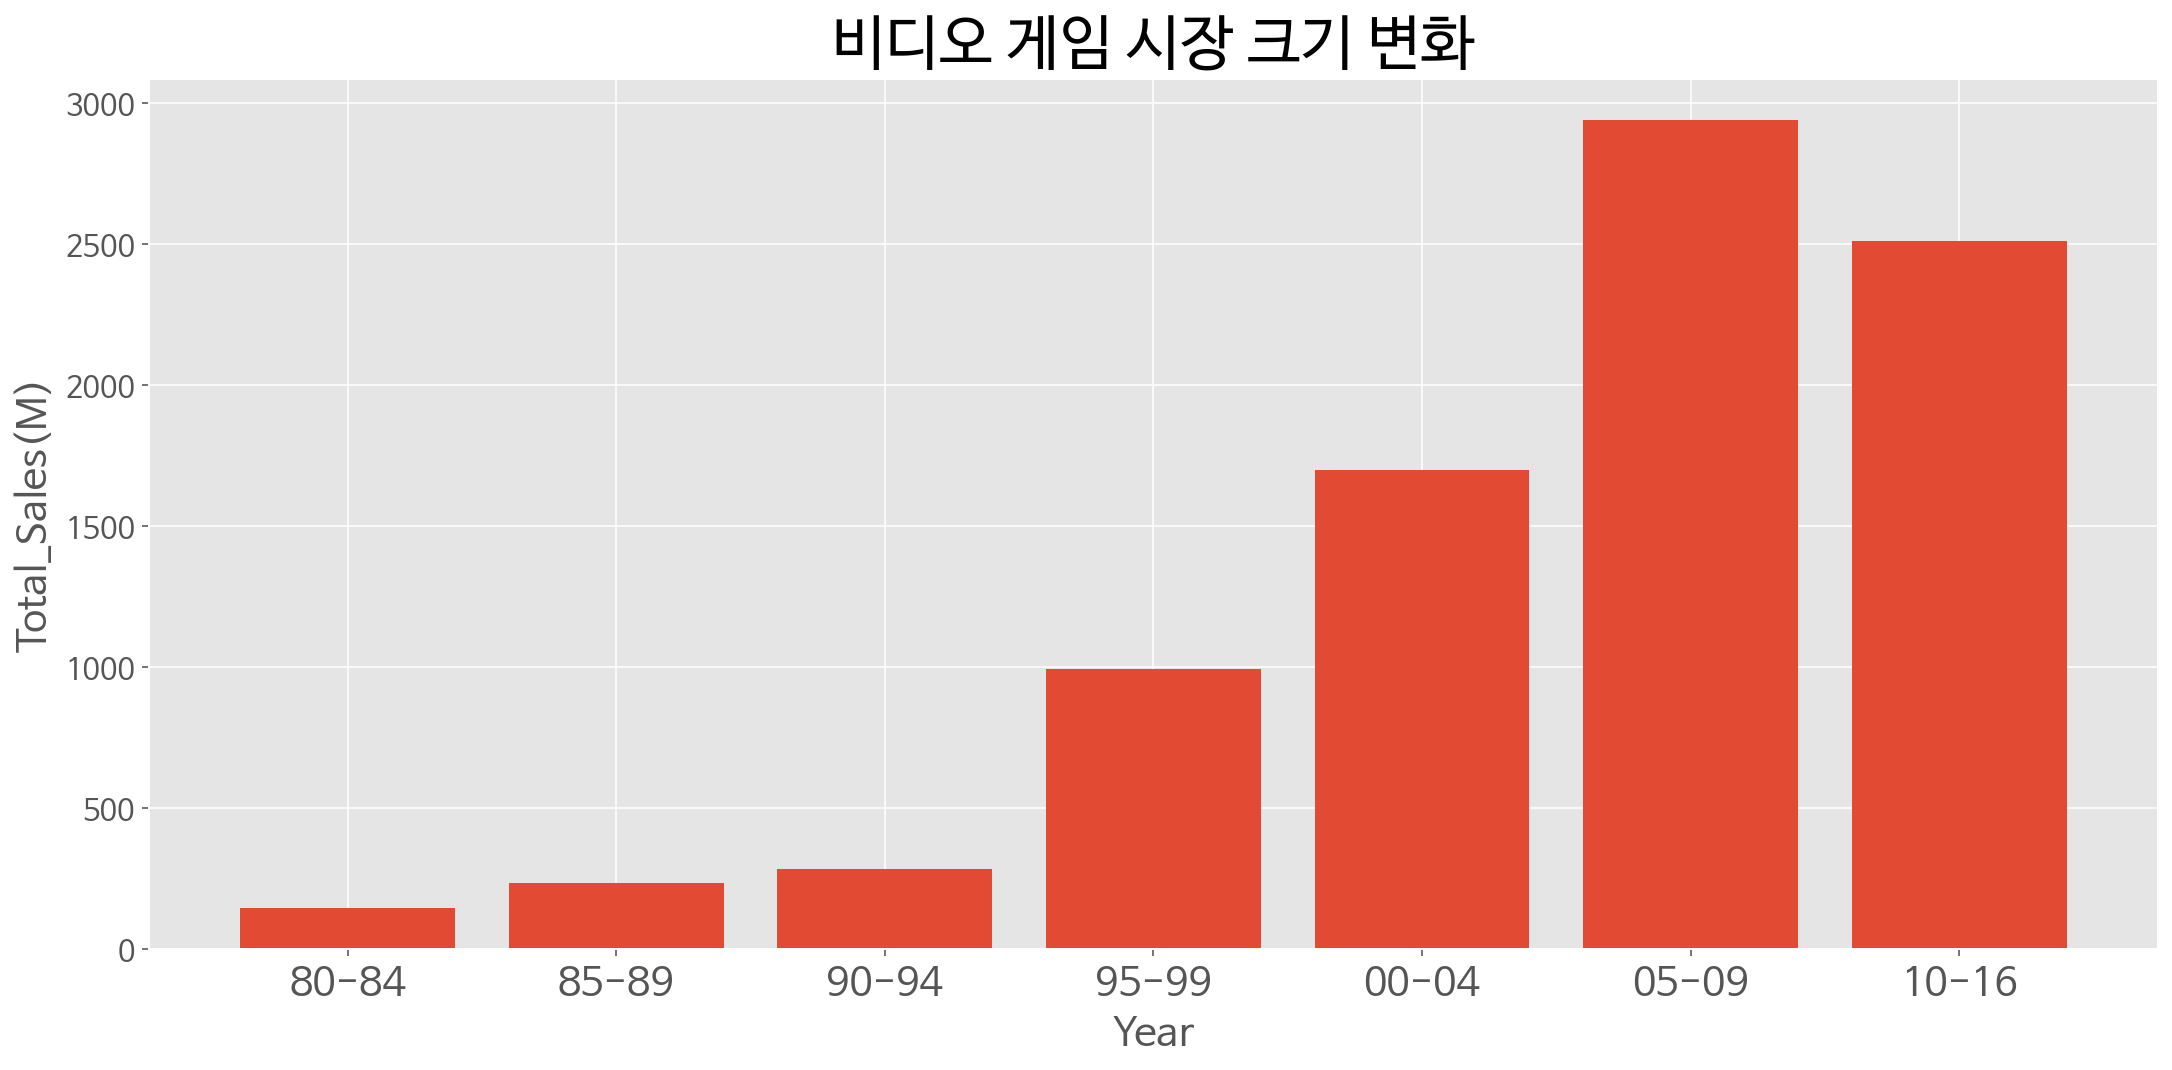

In [124]:
fig = plt.figure(figsize=(18,8))

year = ['80-84', '85-89', '90-94', '95-99', '00-04', '05-09', '10-16']
year_sales = []
for i in range(6):
    year_sales.append(games[(1980+5*i<=games.Year) & (games.Year<1985+5*i)].Total_Sales.sum())
year_sales.append(games[(2010<=games.Year) & (games.Year<=2016)].Total_Sales.sum())

plt.bar(year, year_sales)
plt.xlabel('Year', fontsize=20)
plt.xticks(fontsize=20)
plt.ylabel('Total_Sales(M)', fontsize=20)
plt.yticks(fontsize=15)
plt.title('비디오 게임 시장 크기 변화', fontsize=30)
plt.show()

## 가설 1. 지역에 따라 선호하는 게임 장르가 있을 것이다.
    

In [125]:
region_genre_sales = pd.concat((games['Genre'], games[games.columns[5:9]]), axis=1)
region_genre_sales = region_genre_sales.groupby(by='Genre', axis=0).sum()

region_genre_sales.head()

NA_Sales  EU_Sales  JP_Sales  Other_Sales
Genre                                               
Action       861.02    514.91    156.96       184.64
Adventure    103.59     63.76     51.48        16.75
Fighting     220.35     99.90     87.10        36.15
Misc         398.62    208.80    104.09        73.45
Platform     445.28    200.45    130.53        51.43

In [126]:
#카이제곱검정
print(f'지역-장르 간 카이제곱검정 결과 p-value ={round(chi2_contingency(region_genre_sales)[1], 4)}')

지역-장르 간 카이제곱검정 결과 p-value =0.0


### p-value가 0에 가까우므로, 지역별 선호하는 게임 장르에 차이가 있다고 볼 수 있다.

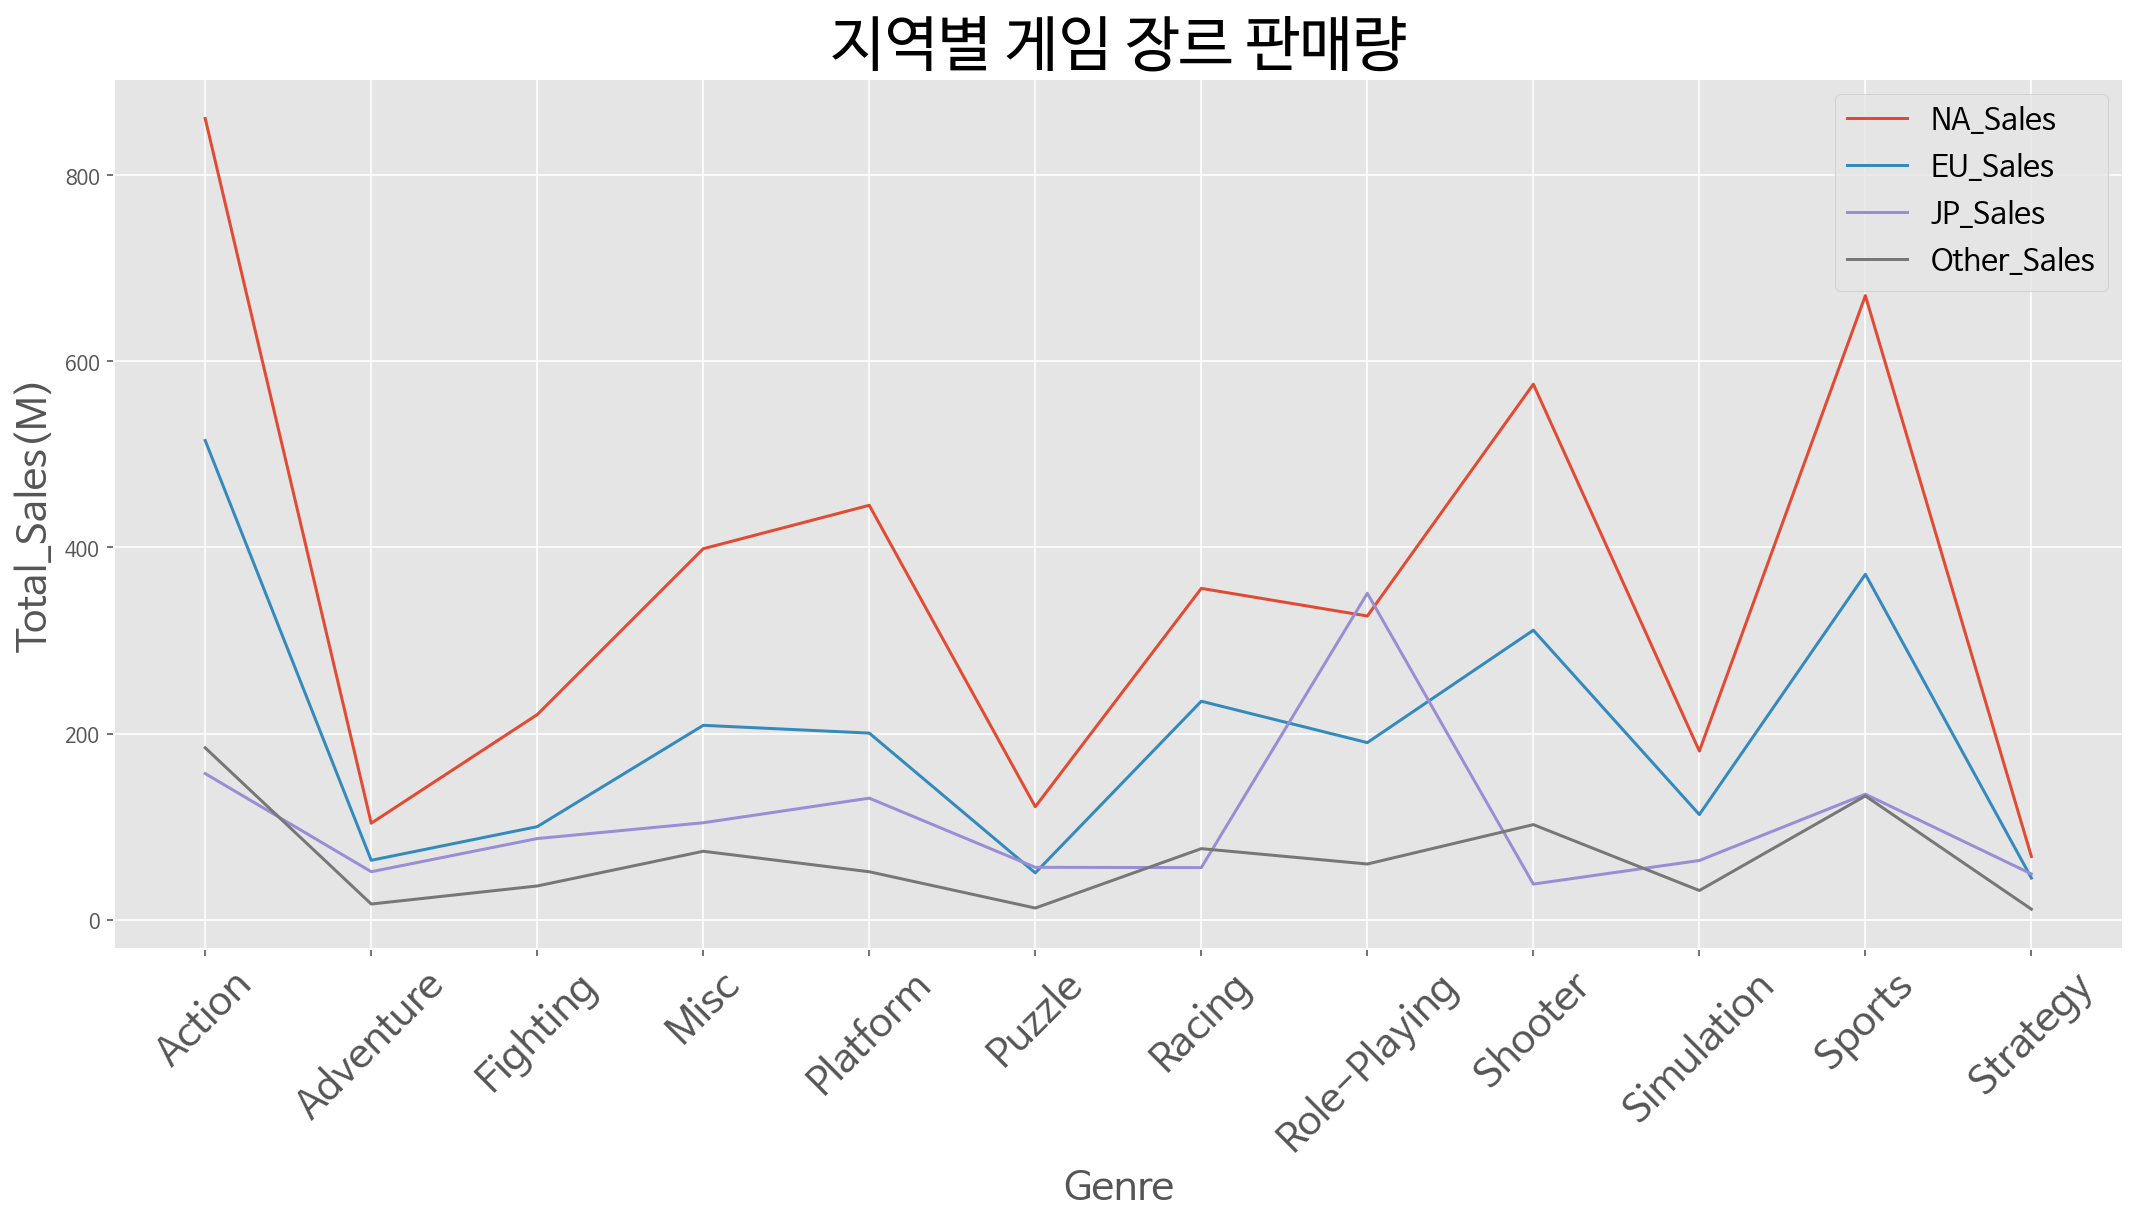

In [127]:
plt.figure(figsize=(18,8))
plt.plot(region_genre_sales)
plt.xlabel('Genre', fontsize=20)
plt.xticks(rotation=45, fontsize=20)
plt.ylabel('Total_Sales(M)', fontsize=20)
plt.legend(region_genre_sales.columns, fontsize=15)
plt.title('지역별 게임 장르 판매량', fontsize=30)
plt.show()

In [128]:
#지역에 따른 장르별 판매량

temp_genre = games[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Total_Sales']]
temp_genre.columns = ['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Total_Sales']
temp_grouped = temp_genre.groupby(['Genre']).sum()
temp_table = temp_grouped.reset_index()

temp_table.columns = ['Genre', '북미', '유럽', '일본', '그 외', 'Total']

temp_melted = pd.melt(temp_table, id_vars=['Genre'], value_vars=temp_table.columns[1:],
                   var_name='Region', value_name='Sales')

plt.figure(figsize=(18, 8))
sns.barplot(x='Region', y='Sales', data=temp_melted, hue='Genre', edgecolor='black')
plt.title('지역에 따른 장르별 판매량', fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('')
plt.ylabel('Total_Sales(M)', fontsize=20)
plt.legend(loc='upper left', ncol=3, fontsize=20)
plt.show()

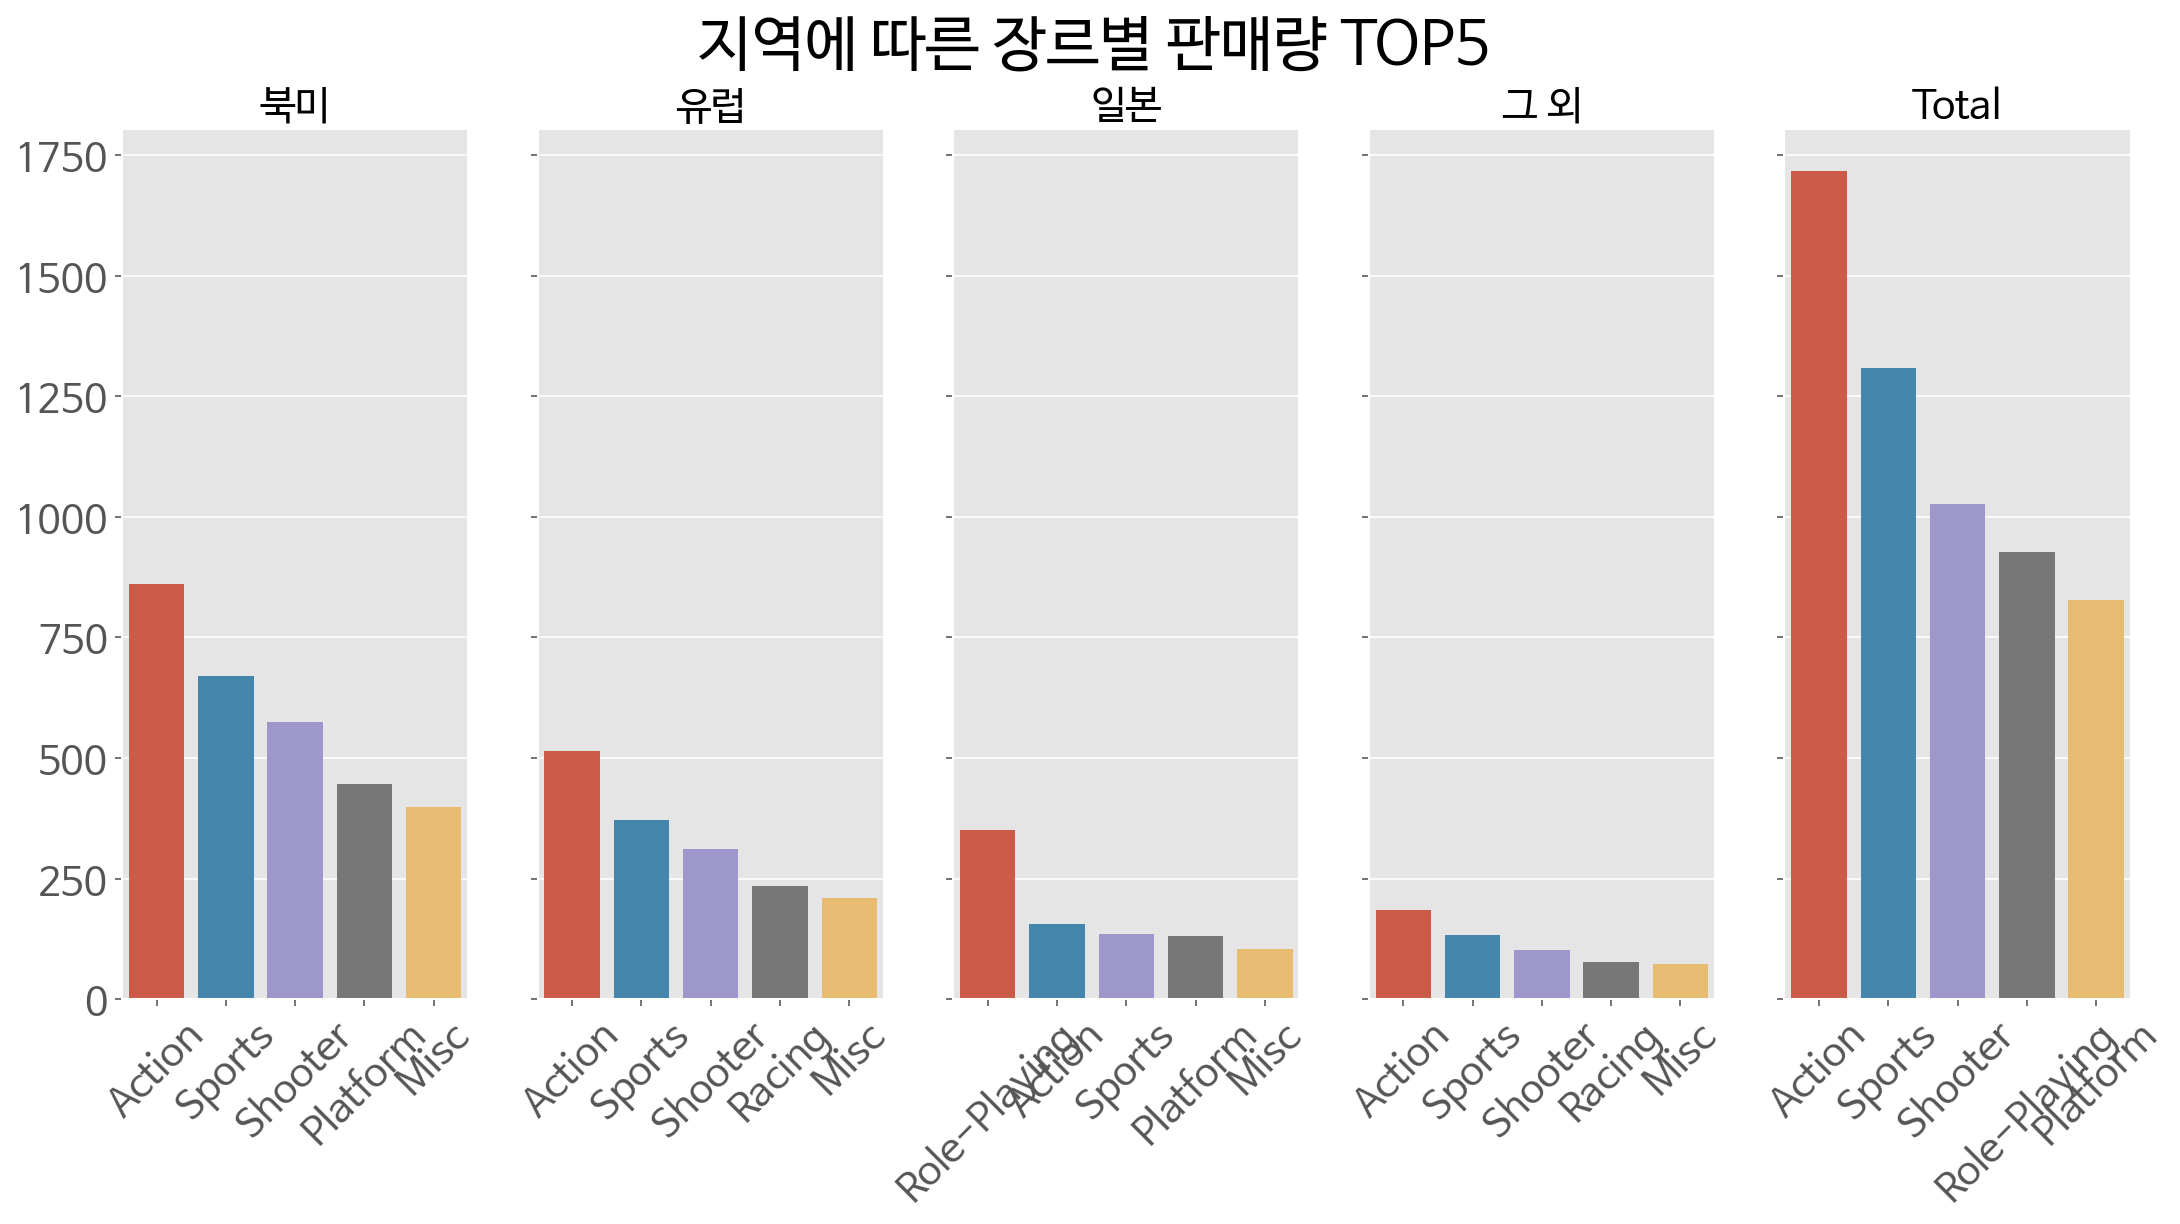

In [129]:
new_NA = temp_table.loc[:, ['Genre', '북미']].sort_values(by='북미', ascending=False).reset_index(drop=True).head(5)
new_NA.columns = ['Genre', 'Sales']

new_EU = temp_table.loc[:, ['Genre', '유럽']].sort_values(by='유럽', ascending=False).reset_index(drop=True).head(5)
new_EU.columns = ['Genre', 'Sales']

new_JP = temp_table.loc[:, ['Genre', '일본']].sort_values(by='일본', ascending=False).reset_index(drop=True).head(5)
new_JP.columns = ['Genre', 'Sales']

new_other = temp_table.loc[:, ['Genre', '그 외']].sort_values(by='그 외', ascending=False).reset_index(drop=True).head(5)
new_other.columns = ['Genre', 'Sales']

new_total = temp_table.loc[:, ['Genre', 'Total']].sort_values(by='Total', ascending=False).reset_index(drop=True).head(5)
new_total.columns = ['Genre', 'Sales']

data_list = [new_NA, new_EU, new_JP, new_other, new_total]
columns_list = ['북미', '유럽', '일본', '그 외', 'Total']

fig, ax = plt.subplots(1, 5, figsize=(18,8), sharey=True)

for col, i, data in zip(columns_list, range(len(columns_list)), data_list):
    sns.barplot(x=data.Genre, y=data.Sales, ax=ax[i])
    ax[i].set_title(col, fontsize=20)
    ax[i].set_xlabel('')
    ax[i].set_ylabel('')
    ax[i].tick_params(axis='x', labelsize=20, rotation=45)
    ax[i].tick_params(axis='y', labelsize=20)
plt.suptitle('지역에 따른 장르별 판매량 TOP5', fontsize=30)
plt.show()

## 가설2. 지역에 따라 선호하는 플랫폼이 있을 것이다.

In [130]:
#지역별 플랫폼의 판매량
region_platform_sales = []
for col in games.columns[5:]:
    globals()['region_platform_sales_{}'.format(col)] = games[['Platform', col]].groupby(by=['Platform']).sum().reset_index()
    region_platform_sales.append(globals()['region_platform_sales_{}'.format(col)])

region_platform_sales[0]

Platform  NA_Sales
0          3DO      0.00
1        Atari     80.05
2       Bandai      0.00
3    Microsoft    858.88
4          NEC      0.00
5     Nintendo   1754.27
6  PlayStation   1516.44
7          SNK      0.00
8         Sega     26.42

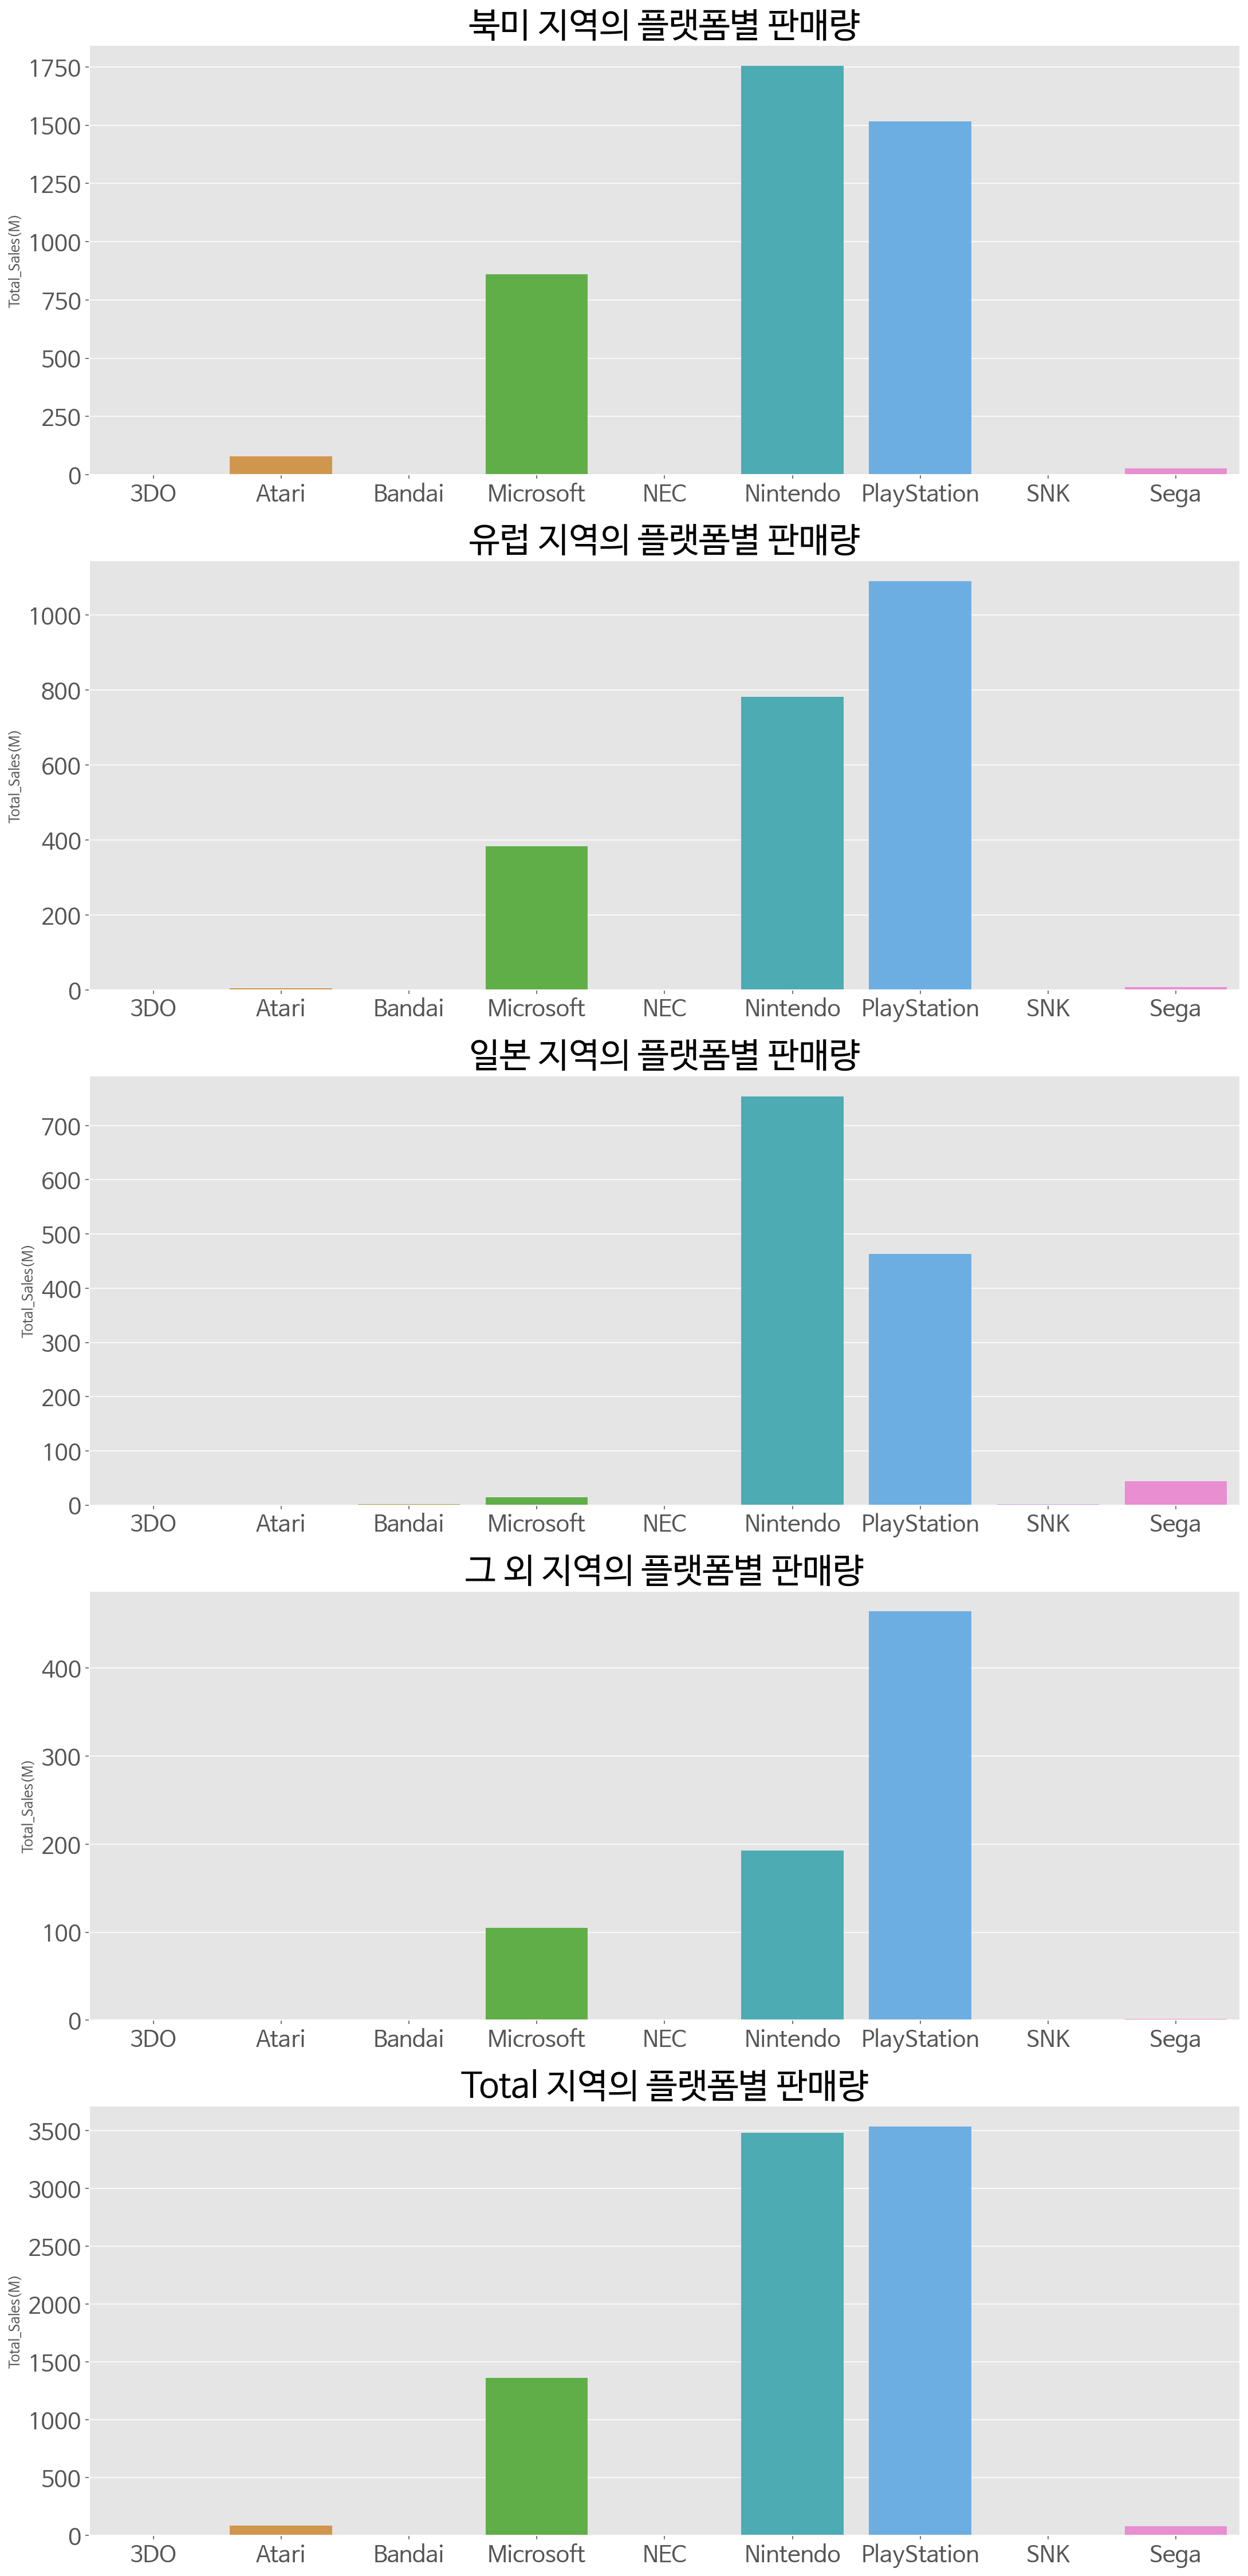

In [131]:
fig, ax = plt.subplots(5, 1, figsize=(18,40))
columns = ['북미', '유럽', '일본', '그 외', 'Total']
for i, df in enumerate(region_platform_sales):
    sns.barplot(data=df, x='Platform', y=df.iloc[:, 1], ax=ax[i])
    ax[i].set_title('{} 지역의 플랫폼별 판매량'.format(columns[i]), fontsize=30)
    ax[i].tick_params(labelsize=20)
    ax[i].set(xlabel='', ylabel='Total_Sales(M)')
    
plt.show()

## 가설3. 연도별 게임 장르의 트렌드가 있을 것이다.

In [132]:
#연도별 출시된 장르별 게임 수
year_genre_num = pd.crosstab(games.Year, games.Genre)

year_genre_num.head()

Genre  Action  Adventure  Fighting  Misc  Platform  Puzzle  Racing  \
Year                                                                 
1978        0          0         0     0         0       0       1   
1980        1          0         1     4         0       0       0   
1981       24          0         0     0         3       2       1   
1982       18          0         0     1         5       3       2   
1983        7          1         0     1         5       1       0   

Genre  Role-Playing  Shooter  Simulation  Sports  Strategy  
Year                                                        
1978              0        0           0       0         0  
1980              0        2           0       0         0  
1981              0       10           1       4         0  
1982              0        5           0       2         0  
1983              0        1           0       1         0

In [133]:
#카이제곱검정
print(f'연도-장르별 게임 수의 카이제곱검정 결과 p-value ={round(chi2_contingency(year_genre_num)[1], 4)}')

연도-장르별 게임 수의 카이제곱검정 결과 p-value =0.0


In [134]:
#연도별 출시된 장르별 판매량
year_genre_sales = pd.crosstab(index=[games.Year], columns=games.Genre, values=games.Total_Sales, 
                 aggfunc='sum', margins=True).fillna(0)

year_genre_sales.head()

Genre  Action  Adventure  Fighting  Misc  Platform  Puzzle  Racing  \
Year                                                                 
1978     0.00        0.0      0.00  0.00      0.00    0.00    0.01   
1980     0.34        0.0      0.77  2.70      0.00    0.00    0.00   
1981    14.50        0.0      0.00  0.00      6.92    2.25    0.48   
1982     6.50        0.0      0.00  0.87      5.03   10.04    1.57   
1983     2.86        0.4      0.00  2.14      6.93    0.78    0.00   

Genre  Role-Playing  Shooter  Simulation  Sports  Strategy    All  
Year                                                               
1978            0.0     0.00        0.00    0.00       0.0   0.01  
1980            0.0     7.07        0.00    0.00       0.0  10.88  
1981            0.0    10.02        0.44    0.78       0.0  35.39  
1982            0.0     3.81        0.00    1.06       0.0  28.88  
1983            0.0     0.49        0.00    3.20       0.0  16.80

In [135]:
#카이제곱검정
print(f'연도-장르별 판매량의 카이제곱검정 결과 p-value ={round(chi2_contingency(year_genre_sales)[1], 4)}')

연도-장르별 판매량의 카이제곱검정 결과 p-value =0.0


### 두가지 모두 p-value가 0에 가까우므로, 연도별 선호하는 게임 장르에 차이가 있다고 볼 수 있다.

In [136]:
plt.figure(figsize=(18,10))
plt.plot(year_genre_num)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Number of games', fontsize=20)
plt.xticks(rotation=45, fontsize=20)
plt.yticks(fontsize=20)
plt.title('연도별 장르 게임 개수', fontsize=30)
plt.legend(year_genre_num.columns, ncol=3, fontsize=18)
plt.show()

In [137]:
for i in range(year_genre_sales.shape[0]):
    for j in range(year_genre_sales.shape[1]-1):
        year_genre_sales.iloc[i, j] /= year_genre_sales.iloc[0].All

year_genre_sales = year_genre_sales.drop(['All'], axis=1)
year_genre_sales = year_genre_sales.iloc[:-1, :]

year_genre_sales.head()

Genre  Action  Adventure  Fighting   Misc  Platform  Puzzle  Racing  \
Year                                                                  
1978      0.0        0.0       0.0    0.0       0.0     0.0     1.0   
1980     34.0        0.0      77.0  270.0       0.0     0.0     0.0   
1981   1450.0        0.0       0.0    0.0     692.0   225.0    48.0   
1982    650.0        0.0       0.0   87.0     503.0  1004.0   157.0   
1983    286.0       40.0       0.0  214.0     693.0    78.0     0.0   

Genre  Role-Playing  Shooter  Simulation  Sports  Strategy  
Year                                                        
1978            0.0      0.0         0.0     0.0       0.0  
1980            0.0    707.0         0.0     0.0       0.0  
1981            0.0   1002.0        44.0    78.0       0.0  
1982            0.0    381.0         0.0   106.0       0.0  
1983            0.0     49.0         0.0   320.0       0.0

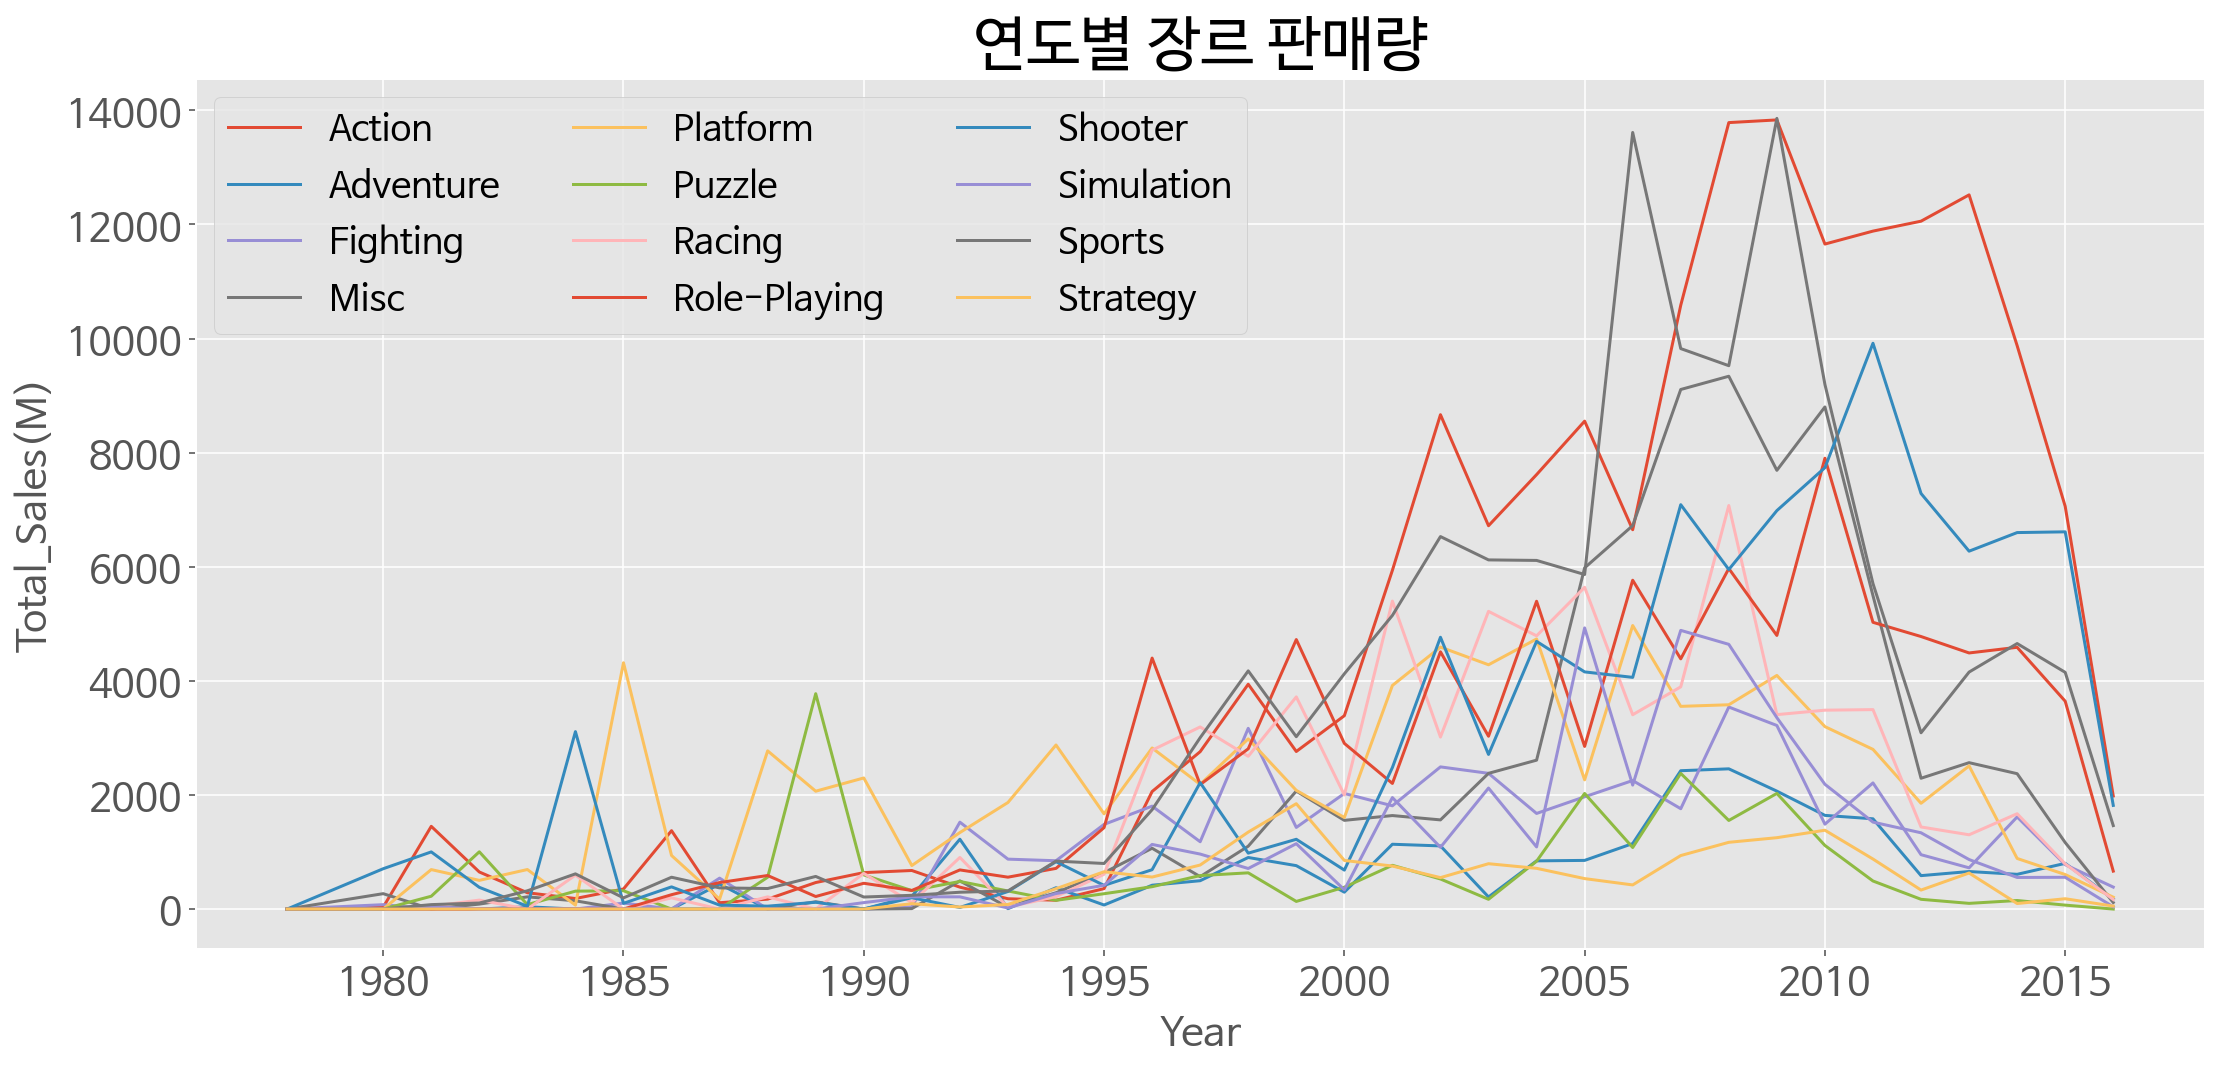

In [138]:
fig = plt.figure(figsize=(18,8))
plt.plot(year_genre_sales)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Total_Sales(M)', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('연도별 장르 판매량', fontsize=30)
plt.legend(year_genre_sales.columns, ncol=3, fontsize=18)
plt.show()

In [139]:
year_max_df = games.groupby(['Year', 'Genre']).size().reset_index(name='count')
year_max_idx = year_max_df.groupby(['Year'])['count'].transform(max) == year_max_df['count']
year_max_genre = year_max_df[year_max_idx].reset_index(drop=True)
year_max_genre = year_max_genre.drop_duplicates(subset=['Year','count'], keep='last').reset_index(drop=True)
year_max_genre[:5]
year_max_genre.columns = ['년도', '장르', '출시량']

genre = year_max_genre['장르'].values

year_max_sales = games.groupby(['Year', 'Genre'])['Total_Sales'].sum().reset_index()
condition = year_max_sales['Total_Sales'] == year_max_sales.groupby(['Year'])['Total_Sales'].transform(max)
year_max_sales = year_max_sales[condition]
year_max_sales.columns = ['년도', '장르', '전세계 판매량']
year_max_sales.head()

년도        장르  전세계 판매량
0   1978    Racing     0.01
4   1980   Shooter     7.07
5   1981    Action    14.50
15  1982    Puzzle    10.04
22  1983  Platform     6.93

In [140]:
plt.figure(figsize=(18,8))
ax = sns.barplot(x='년도', y='출시량', data=year_max_genre)
idx = 0
for value in year_max_genre['출시량']:
    ax.text(x=idx, y=value + 10, s=str(genre[idx]),
            color='black', size=18, rotation=90, ha='center')
    idx += 1
plt.xticks(rotation=45, fontsize=15)
plt.yticks(fontsize=20)
plt.ylim([0,320])
plt.xlabel('Year', fontsize=20)
plt.ylabel('Total_Sales(M)', fontsize=20)
ax.set_title('연도별 판매량 1위 장르', fontsize=30)
plt.show()

In [141]:
genre_year_list = []
for i in range(6):
    genre_year_list.append(year_genre_sales[(1980+5*i <= year_genre_sales.index) & (year_genre_sales.index < 1985+5*i)].sum(axis=0))
genre_year_list.append(year_genre_sales[(2010<=year_genre_sales.index) & (year_genre_sales.index<=2016)].sum(axis=0))
gy_df = pd.DataFrame(genre_year_list)
gy_df['total'] = gy_df.sum(axis=1)
gy_df.index = ['80-84', '85-89', '90-94', '95-99', '00-04', '05-09', '10-16']
for i in range (7):
    for j in range(12):
        gy_df.iloc[i, j] /= gy_df.iloc[i, -1]
        
fig = plt.figure(figsize=(18,8))

ax = fig.add_subplot(1, 1, 1)
sns.lineplot(data=pd.DataFrame(gy_df), linewidth=3, dashes=False)
plt.xticks(fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.ylabel('점유율(총합=1)', fontsize=20)
plt.yticks(fontsize=20)
plt.ylim([0, 0.5])
plt.title('장르별 시장 점유율', fontsize=30)
plt.legend(fontsize=16, ncol=3)
plt.show()

## 가설 4. 연도별 플랫폼의 트렌드가 있을 것이다.

In [142]:
#연도별 각 플랫폼에서 출시된 게임 개수
year_platform_count = games.groupby(['Year', 'Platform']).size().reset_index(name='count')

year_platform_count

Year     Platform  count
0    1978     Nintendo      1
1    1980        Atari      8
2    1981        Atari     45
3    1982        Atari     36
4    1983        Atari     11
..    ...          ...    ...
106  2015     Nintendo    117
107  2015  PlayStation    323
108  2016    Microsoft     62
109  2016     Nintendo     45
110  2016  PlayStation    193

[111 rows x 3 columns]

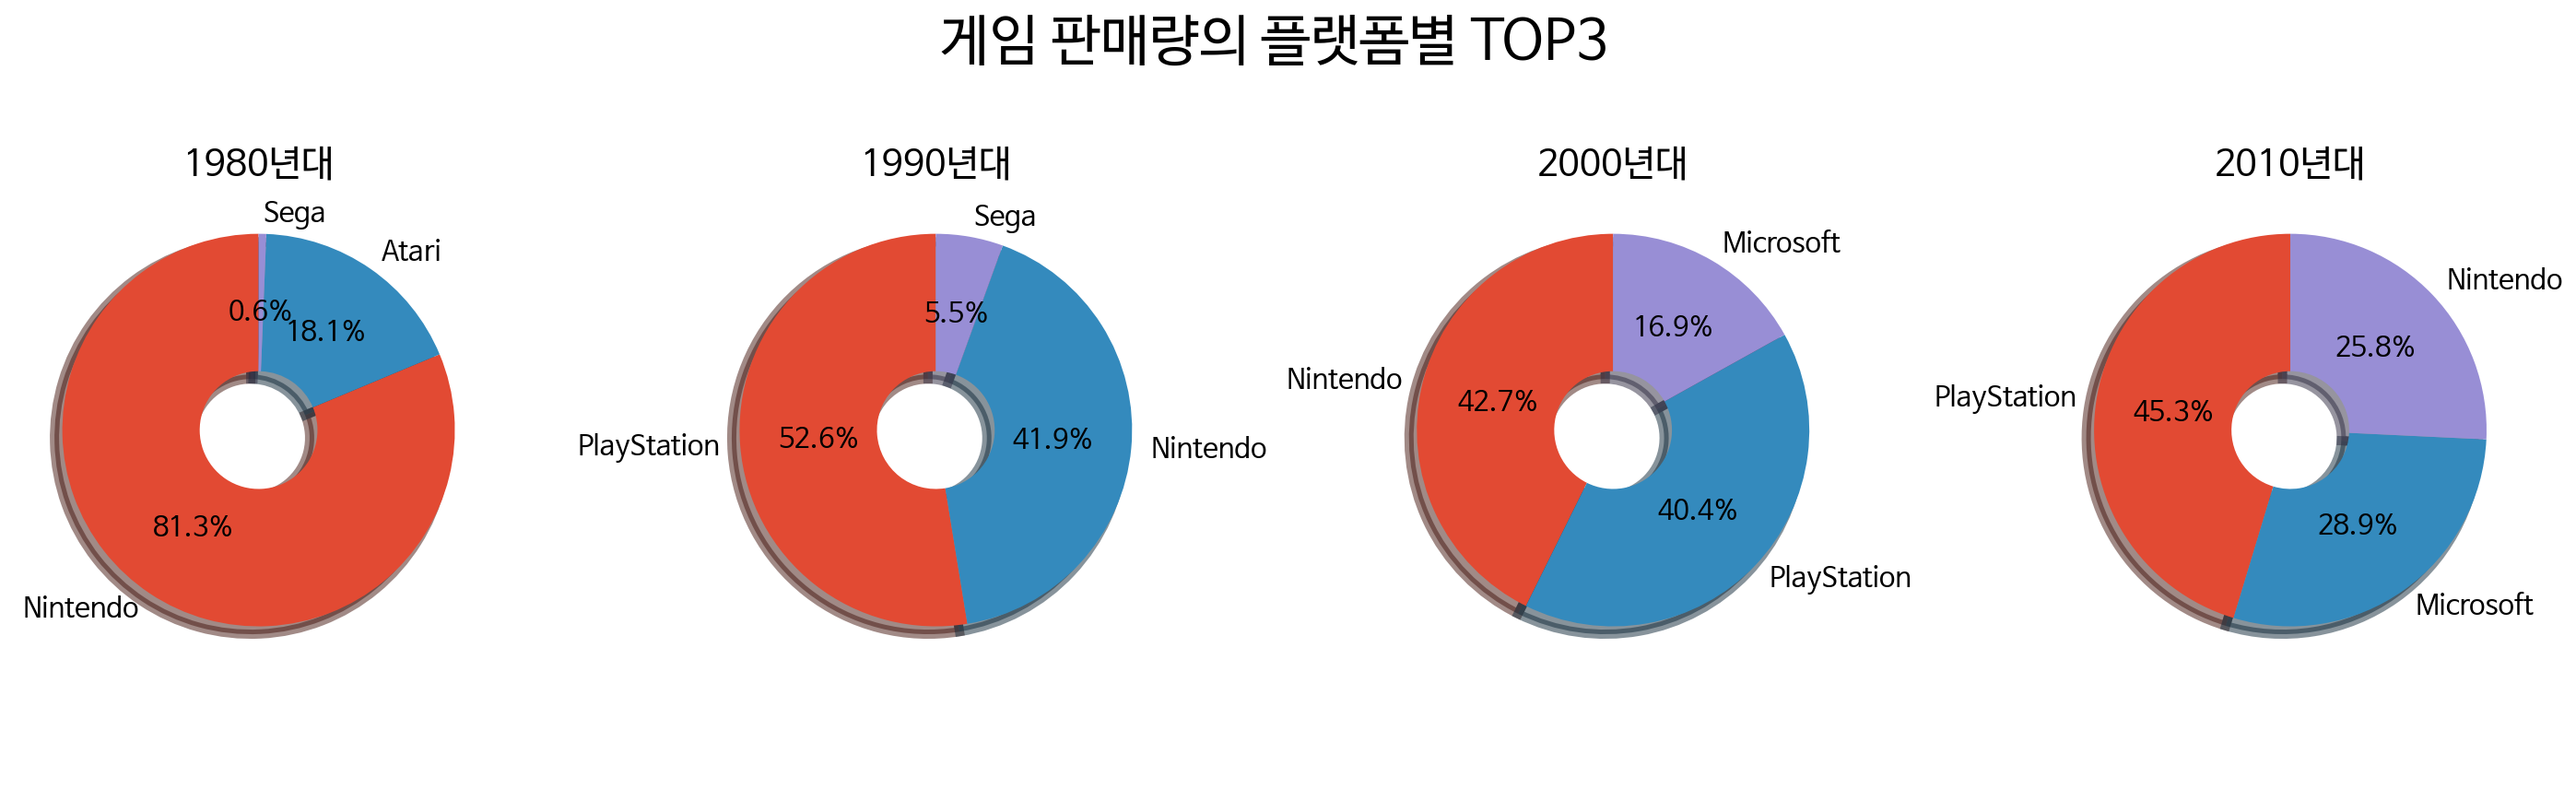

In [143]:
fig = plt.figure(figsize=(19.5, 5.8))
plt.title('출시게임 수의 플랫폼별 TOP3', fontsize=30)
plt.axis('off')

for i in range(4):
    labels = games[(1980+10*i < games['Year']) & (games['Year'] <= 1990+10*i)].Platform.value_counts().index.tolist()[:3]
    frequency = games[(1980+10*i < games['Year']) & (games['Year'] <= 1990+10*i)].Platform.value_counts().values.tolist()[:3]

    wedgeprops={'width': 0.7, 'linewidth': 5}
    ax = fig.add_subplot(1, 4, i+1)
    ax.pie(frequency, labels=labels, 
          startangle=90, autopct='%.1f%%', shadow=True, wedgeprops=wedgeprops, textprops={'fontsize': 15})
    plt.title(f'{1980+10*i}년대', fontsize=20)
    plt.tight_layout()

fig = plt.figure(figsize=(19.5,5.8))
plt.title('게임 판매량의 플랫폼별 TOP3', fontsize=30)
plt.axis('off')

for i in range(4):
    df = games[(1980+10*i < games['Year']) & (games['Year'] <= 1990+10*i)]
    labels = df.groupby(df['Platform']).sum().Total_Sales.sort_values(ascending=False).index.tolist()[:3]
    frequency = df.groupby(df['Platform']).sum().Total_Sales.sort_values(ascending=False).values.tolist()[:3]


    wedgeprops={'width': 0.7, 'linewidth': 5}
    ax = fig.add_subplot(1, 4, i+1)
    ax.pie(frequency, labels=labels, 
          startangle=90, autopct='%.1f%%', shadow=True, wedgeprops=wedgeprops, textprops={'fontsize': 15})
    plt.title(f'{1980+10*i}년대', fontsize=20)
    plt.tight_layout();

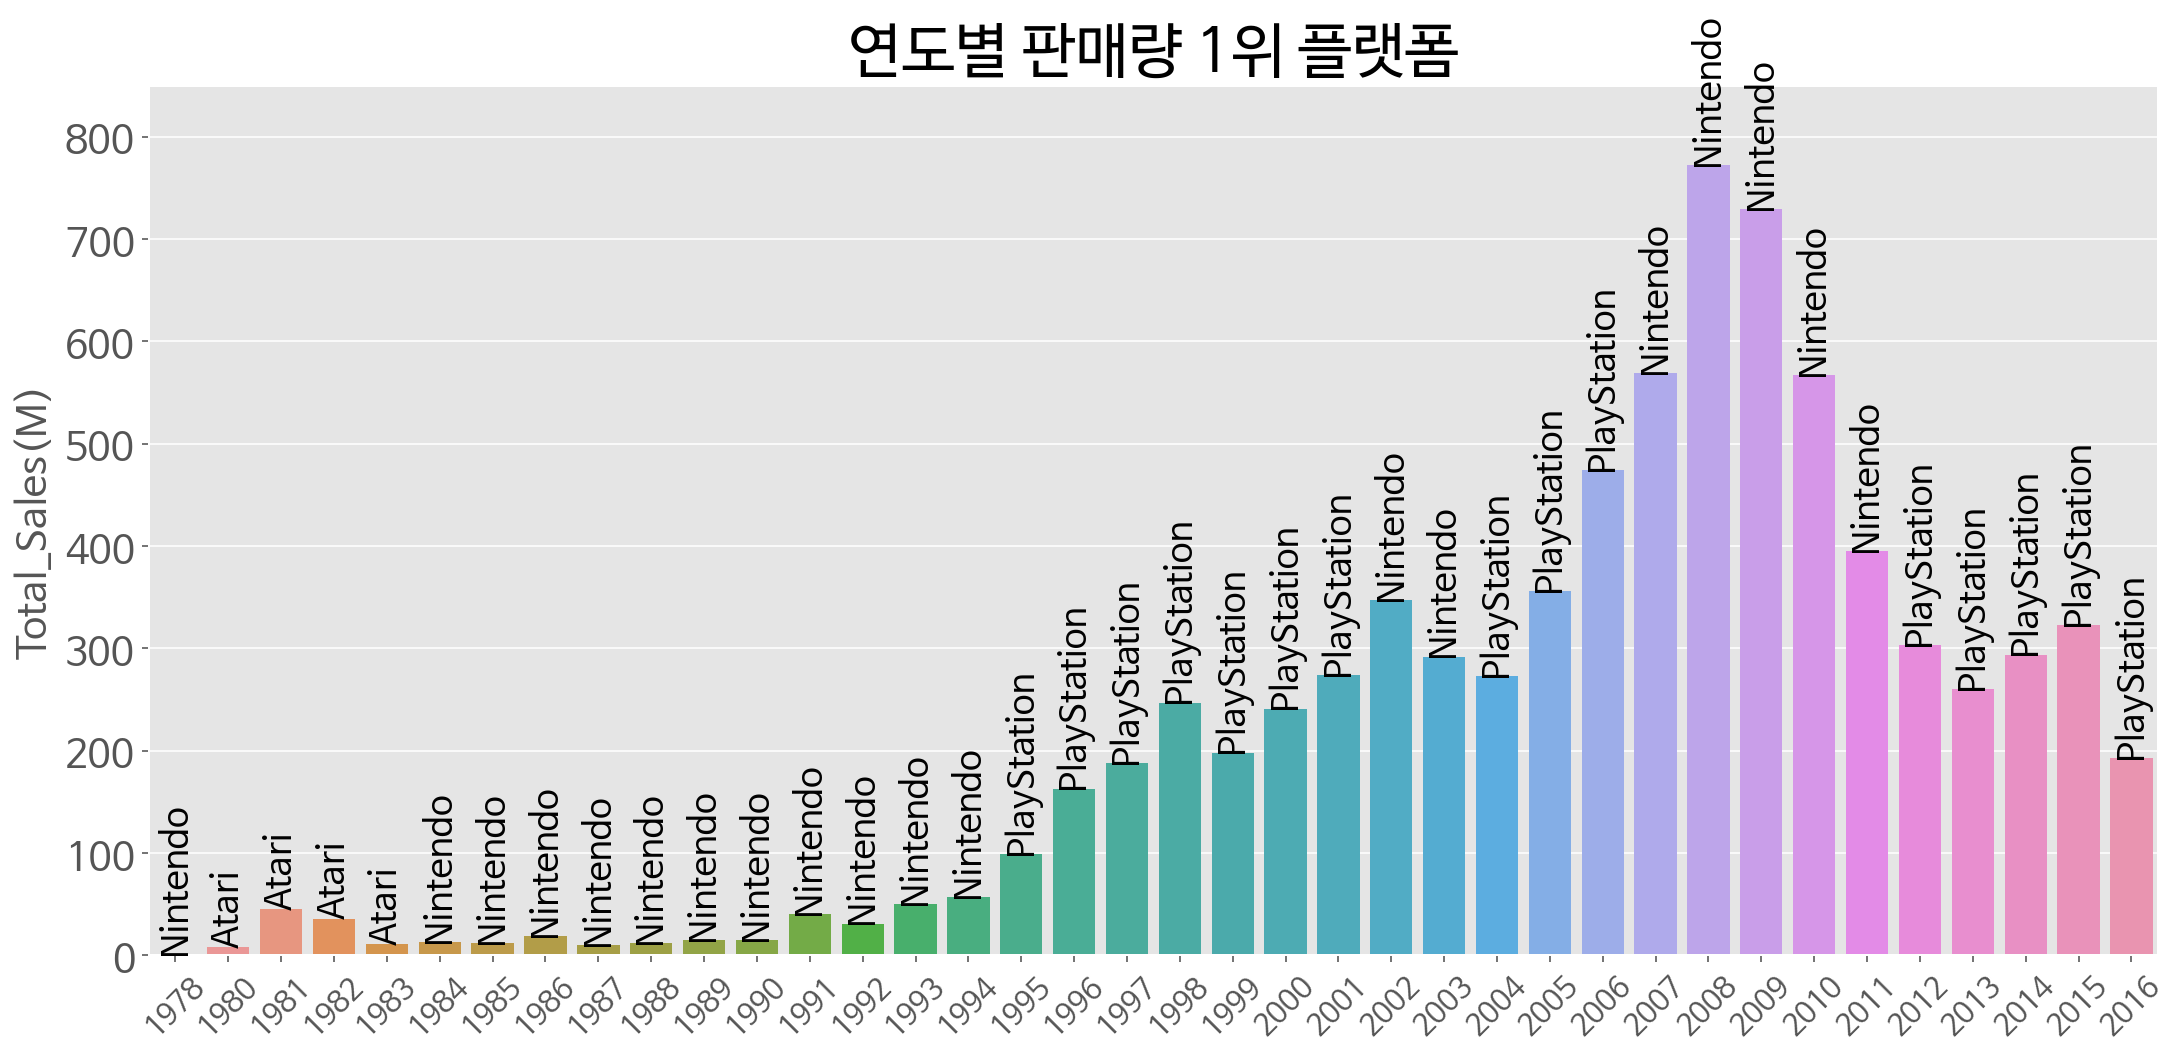

In [144]:
year_max_pf = games.groupby(['Year', 'Platform']).size().reset_index(name='count')

condition = year_max_pf.groupby(['Year'])['count'].transform(max) == year_max_pf['count']
year_max_pf = year_max_pf[condition].reset_index(drop=True)

year_max_pf = year_max_pf.drop_duplicates(subset=['Year','count'], keep='last').reset_index(drop=True)
year_max_pf.columns = ['년도', '플랫폼', '출시량']

platform = year_max_pf['플랫폼'].values

plt.figure(figsize=(18,8))
ax = sns.barplot(x='년도', y='출시량', data=year_max_pf)
idx = 0
for value in year_max_pf['출시량']:
    ax.text(x=idx, y=value + 10, s=str(platform[idx]),
            color='black', size=18, rotation=90, ha='center')
    idx += 1
plt.xticks(rotation=45, fontsize=15)
plt.yticks(fontsize=20)
plt.ylim([0, 850])
plt.xlabel('')
plt.ylabel('Total_Sales(M)', fontsize=20)
plt.title('연도별 판매량 1위 플랫폼', fontsize=30)
plt.show()

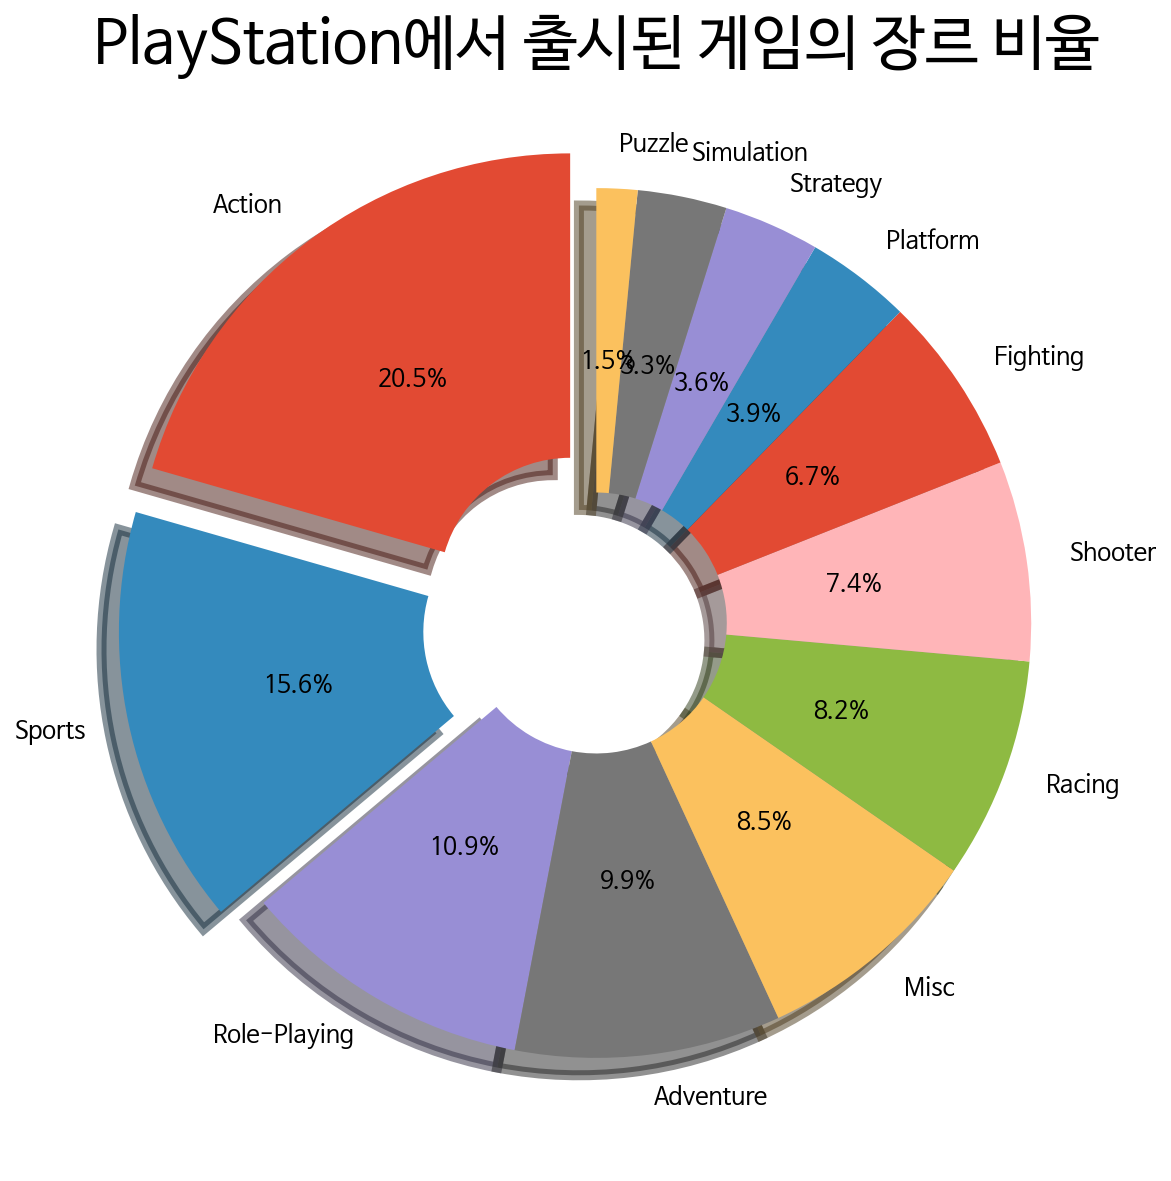

In [145]:
labels = games[games.Platform == 'PlayStation'].Genre.value_counts().index
frequency = games[games.Platform == 'PlayStation'].Genre.value_counts().values

fig = plt.figure(figsize=(10,10))
explode = [0.1, 0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
wedgeprops={'width': 0.7, 'linewidth': 5}
ax = fig.add_subplot(1, 1, 1)
ax.pie(frequency, labels=labels, explode=explode,
        startangle=90, autopct='%.1f%%', shadow=True,
        wedgeprops=wedgeprops, textprops={'fontsize': 12})
plt.title('PlayStation에서 출시된 게임의 장르 비율', fontsize=30)
plt.show()

## 가설5. 연도별 게임 제작사의 트렌드가 있을 것이다.

In [146]:
print('제작사 개수 :', len(games.Publisher.unique()))
print(sorted(games.Publisher.unique()))

제작사 개수 : 574
['10TACLE Studios', '1C Company', '20th Century Fox Video Games', '2D Boy', '3DO', '49Games', '505 Games', '5pb', '7G//AMES', '989 Sports', '989 Studios', 'AQ Interactive', 'ASC Games', 'ASCII Entertainment', 'ASCII Media Works', 'ASK', 'Abylight', 'Acclaim Entertainment', 'Accolade', 'Ackkstudios', 'Acquire', 'Activision', 'Activision Blizzard', 'Activision Value', 'Adeline Software', 'Aerosoft', 'Agatsuma Entertainment', 'Agetec', 'Aksys Games', 'Alawar Entertainment', 'Alchemist', 'Alternative Software', 'Altron', 'Alvion', 'American Softworks', 'Angel Studios', 'Answer Software', 'Aqua Plus', 'Aques', 'Arc System Works', 'Arena Entertainment', 'Aria', 'Arika', 'ArtDink', 'Aruze Corp', 'Ascaron Entertainment', 'Ascaron Entertainment GmbH', 'Asgard', 'Asmik Ace Entertainment', 'Asmik Corp', 'Aspyr', 'Astragon', 'Asylum Entertainment', 'Atari', 'Athena', 'Atlus', 'Avalon Interactive', 'Avanquest', 'Avanquest Software', 'Axela', 'BAM! Entertainment', 'BMG Interactive Enter

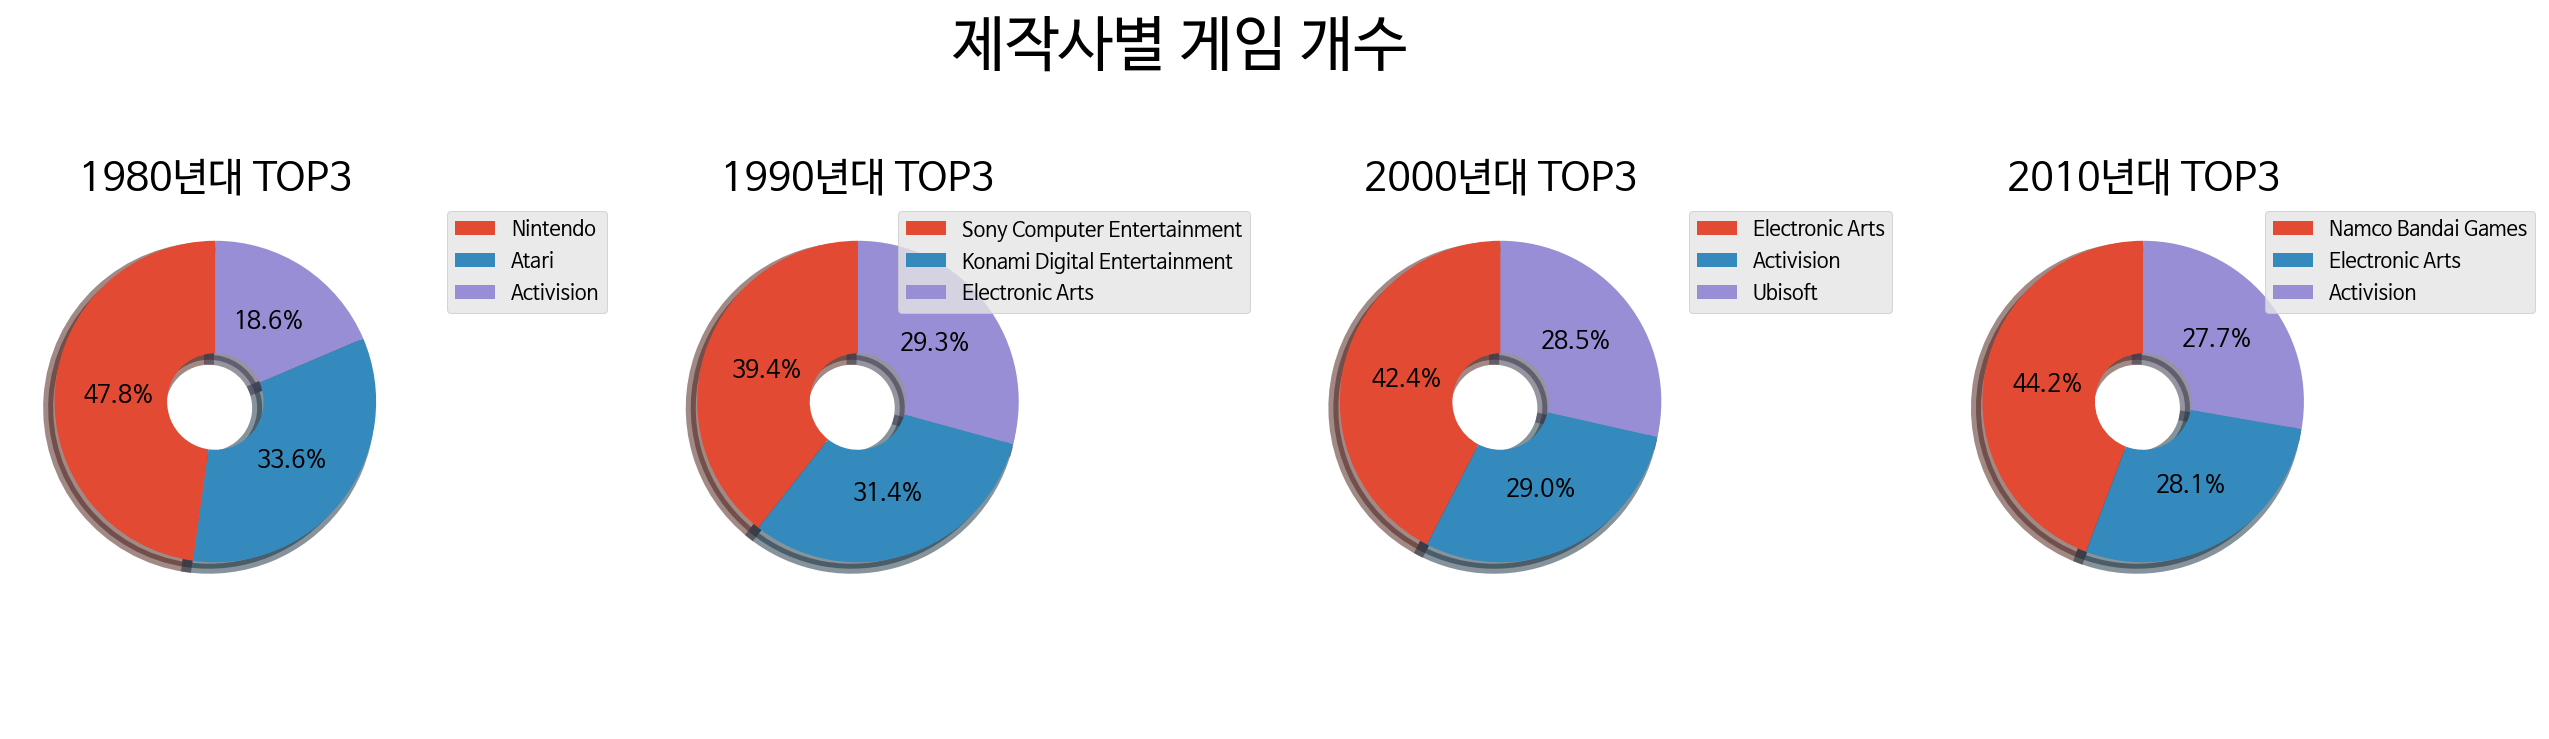

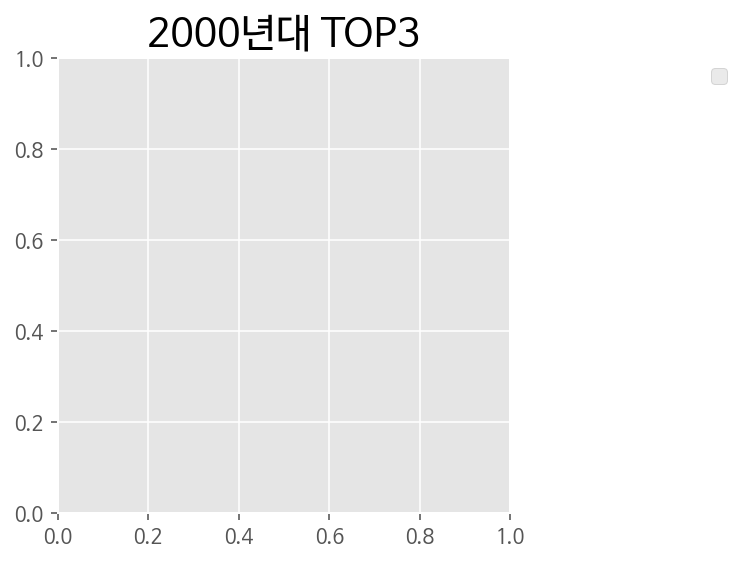

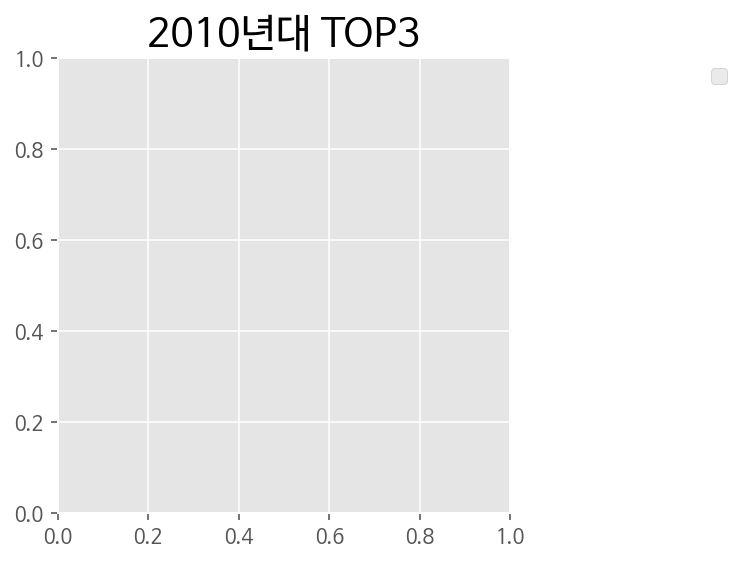

In [161]:
fig = plt.figure(figsize=(18, 5))
plt.title('제작사별 게임 개수', fontsize=30)
plt.axis('off')

for i in range(4):
    df = games[(1980+10*i < games['Year']) & (games['Year'] <= 1990+10*i)]
    year_max_com = df.groupby('Publisher').size().reset_index(name='count').sort_values(by='count', ascending=False)
    labels = year_max_com.Publisher.tolist()[:3]
    frequency = year_max_com['count'].tolist()[:3]
    wedgeprops={'width': 0.7, 'linewidth': 5}
    ax = fig.add_subplot(1, 4, i+1)
    ax.pie(frequency,
          startangle=90, autopct='%.1f%%', shadow=True,
          wedgeprops=wedgeprops, textprops={'fontsize': 12})
    plt.legend(labels, loc='upper right',bbox_to_anchor=(1.5, 1))
    plt.title(f"{1980+10*i}년대 TOP3", fontsize=20)
    plt.tight_layout()

fig = plt.figure(figsize=(18, 5))
plt.title('제작사별 판매량', fontsize=30)
plt.axis('off')

for i in range(4):
    df = games[(1980+10*i < games['Year']) & (games['Year'] <= 1990+10*i)]
    labels = df.groupby(df['Publisher']).sum().Total_Sales.sort_values(ascending=False).index.tolist()[:3]
    frequency = df.groupby(df['Publisher']).sum().Total_Sales.sort_values(ascending=False).values.tolist()[:3]
    wedgeprops={'width': 0.7, 'linewidth': 5}
    ax = fig.add_subplot(1, 4, i+1)
    ax.pie(frequency,
          startangle=90, autopct='%.1f%%', shadow=True,
          wedgeprops=wedgeprops, textprops={'fontsize': 12})
    plt.legend(labels, loc='upper right',bbox_to_anchor=(1.5, 1))
    plt.title(f"{1980+10*i}년대 TOP3", fontsize=20)
    plt.tight_layout()
    plt.show()

In [162]:
#역대 판매량 순위 20
games.sort_values(by='Total_Sales', ascending=False).head(20)

Name     Platform  Year  \
2877                                     Wii Sports     Nintendo  2006   
4150                              Super Mario Bros.     Nintendo  1985   
12431                                Mario Kart Wii     Nintendo  2008   
3314                              Wii Sports Resort     Nintendo  2009   
7730                       Pokemon Red/Pokemon Blue     Nintendo  1996   
1191                                         Tetris     Nintendo  1989   
6853                          New Super Mario Bros.     Nintendo  2006   
2981                                       Wii Play     Nintendo  2006   
16328                     New Super Mario Bros. Wii     Nintendo  2009   
10363                                     Duck Hunt     Nintendo  1984   
11005                                    Nintendogs     Nintendo  2005   
10523                                 Mario Kart DS     Nintendo  2005   
9304                    Pokemon Gold/Pokemon Silver     Nintendo  1999   
3396                                        Wii Fit     Nintendo  2007   
10770                                  Wii Fit Plus     Nintendo  2009   
4292                             Kinect Adventures!    Microsoft  2010   
3444                             Grand Theft Auto V  PlayStation  2013   
14492                 Grand Theft Auto: San Andreas  PlayStation  2004   
12959                             Super Mario World     Nintendo  1990   
13074  Brain Age: Train Your Brain in Minutes a Day     Nintendo  2005   

              Genre               Publisher  NA_Sales  EU_Sales  JP_Sales  \
2877         Sports                Nintendo     41.49     29.02      3.77   
4150       Platform                Nintendo     29.08      3.58      6.81   
12431        Racing                Nintendo     15.85     12.88      3.79   
3314         Sports                Nintendo     15.75     11.01      3.28   
7730   Role-Playing                Nintendo     11.27      8.89     10.22   
1191         Puzzle                Nintendo     23.20      2.26      4.22   
6853       Platform                Nintendo     11.38      9.23      6.50   
2981           Misc                Nintendo     14.03      9.20      2.93   
16328      Platform                Nintendo     14.59      7.06      4.70   
10363       Shooter                Nintendo     26.93      0.63      0.28   
11005    Simulation                Nintendo      9.07     11.00      1.93   
10523        Racing                Nintendo      9.81      7.57      4.13   
9304   Role-Playing                Nintendo      9.00      6.18      7.20   
3396         Sports                Nintendo      8.94      8.03      3.60   
10770        Sports                Nintendo      9.09      8.59      2.53   
4292           Misc  Microsoft Game Studios     14.97      4.94      0.24   
3444         Action    Take-Two Interactive      7.01      9.27      0.97   
14492        Action    Take-Two Interactive      9.43      0.40      0.41   
12959      Platform                Nintendo     12.78      3.75      3.54   
13074          Misc                Nintendo      4.75      9.26      4.16   

       Other_Sales  Total_Sales  
2877          8.46        82.74  
4150          0.77        40.24  
12431         3.31        35.83  
3314          2.96        33.00  
7730          1.00        31.38  
1191          0.58        30.26  
6853          2.90        30.01  
2981          2.85        29.01  
16328         2.26        28.61  
10363         0.47        28.31  
11005         2.75        24.75  
10523         1.92        23.43  
9304          0.71        23.09  
3396          2.15        22.72  
10770         1.79        22.00  
4292          1.67        21.82  
3444          4.14        21.39  
14492        10.57        20.81  
12959         0.55        20.62  
13074         2.05        20.22

In [163]:
labels = games[games.Publisher.str.contains('Nintendo')].Genre.value_counts().head(8).index
frequency = games[games.Publisher.str.contains('Nintendo')].Genre.value_counts().head(8).values

fig = plt.figure(figsize=(10,10))
explode = [0.1, 0.1, 0, 0, 0, 0, 0, 0]
wedgeprops={'width': 0.7, 'linewidth': 5}
ax = fig.add_subplot(1, 1, 1)
ax.pie(frequency, labels=labels, explode=explode,
        startangle=90, autopct='%.1f%%', shadow=True,
          wedgeprops=wedgeprops, textprops={'fontsize': 12})
plt.title('닌텐도가 출시한 게임의 장르 비율', fontsize=30)
plt.show();

In [164]:
labels = games[games.Publisher=='Electronic Arts'].Genre.value_counts().head(8).index
frequency = games[games.Publisher=='Electronic Arts'].Genre.value_counts().head(8).values

fig = plt.figure(figsize=(20,10))
explode = [0.1, 0.1, 0, 0, 0, 0, 0, 0]
wedgeprops={'width': 0.7, 'linewidth': 5}
ax = fig.add_subplot(1, 2, 1)
ax.pie(frequency, labels=labels, explode=explode,
        startangle=90, autopct='%.1f%%', shadow=True,
          wedgeprops=wedgeprops, textprops={'fontsize': 12})
plt.title('Electronic Arts가 출시한 게임의 장르 비율', fontsize=30)

labels = games[games.Publisher=='Activision'].Genre.value_counts().head(8).index
frequency = games[games.Publisher=='Activision'].Genre.value_counts().head(8).values


explode = [0.1, 0.1, 0, 0, 0, 0, 0, 0]
wedgeprops={'width': 0.7, 'linewidth': 5}
ax = fig.add_subplot(1, 2, 2)
ax.pie(frequency, labels=labels, explode=explode,
        startangle=90, autopct='%.1f%%', shadow=True,
          wedgeprops=wedgeprops, textprops={'fontsize': 15})
plt.title('Activision이 출시한 게임의 장르 비율', fontsize=30)
plt.show();

## +) 출고량이 높은 게임에는 어떤 특징이 있는가?

In [151]:
#역대 출고량 top20
games.sort_values(by='Total_Sales', ascending=False).head(20)

Name     Platform  Year  \
2877                                     Wii Sports     Nintendo  2006   
4150                              Super Mario Bros.     Nintendo  1985   
12431                                Mario Kart Wii     Nintendo  2008   
3314                              Wii Sports Resort     Nintendo  2009   
7730                       Pokemon Red/Pokemon Blue     Nintendo  1996   
1191                                         Tetris     Nintendo  1989   
6853                          New Super Mario Bros.     Nintendo  2006   
2981                                       Wii Play     Nintendo  2006   
16328                     New Super Mario Bros. Wii     Nintendo  2009   
10363                                     Duck Hunt     Nintendo  1984   
11005                                    Nintendogs     Nintendo  2005   
10523                                 Mario Kart DS     Nintendo  2005   
9304                    Pokemon Gold/Pokemon Silver     Nintendo  1999   
3396                                        Wii Fit     Nintendo  2007   
10770                                  Wii Fit Plus     Nintendo  2009   
4292                             Kinect Adventures!    Microsoft  2010   
3444                             Grand Theft Auto V  PlayStation  2013   
14492                 Grand Theft Auto: San Andreas  PlayStation  2004   
12959                             Super Mario World     Nintendo  1990   
13074  Brain Age: Train Your Brain in Minutes a Day     Nintendo  2005   

              Genre               Publisher  NA_Sales  EU_Sales  JP_Sales  \
2877         Sports                Nintendo     41.49     29.02      3.77   
4150       Platform                Nintendo     29.08      3.58      6.81   
12431        Racing                Nintendo     15.85     12.88      3.79   
3314         Sports                Nintendo     15.75     11.01      3.28   
7730   Role-Playing                Nintendo     11.27      8.89     10.22   
1191         Puzzle                Nintendo     23.20      2.26      4.22   
6853       Platform                Nintendo     11.38      9.23      6.50   
2981           Misc                Nintendo     14.03      9.20      2.93   
16328      Platform                Nintendo     14.59      7.06      4.70   
10363       Shooter                Nintendo     26.93      0.63      0.28   
11005    Simulation                Nintendo      9.07     11.00      1.93   
10523        Racing                Nintendo      9.81      7.57      4.13   
9304   Role-Playing                Nintendo      9.00      6.18      7.20   
3396         Sports                Nintendo      8.94      8.03      3.60   
10770        Sports                Nintendo      9.09      8.59      2.53   
4292           Misc  Microsoft Game Studios     14.97      4.94      0.24   
3444         Action    Take-Two Interactive      7.01      9.27      0.97   
14492        Action    Take-Two Interactive      9.43      0.40      0.41   
12959      Platform                Nintendo     12.78      3.75      3.54   
13074          Misc                Nintendo      4.75      9.26      4.16   

       Other_Sales  Total_Sales  
2877          8.46        82.74  
4150          0.77        40.24  
12431         3.31        35.83  
3314          2.96        33.00  
7730          1.00        31.38  
1191          0.58        30.26  
6853          2.90        30.01  
2981          2.85        29.01  
16328         2.26        28.61  
10363         0.47        28.31  
11005         2.75        24.75  
10523         1.92        23.43  
9304          0.71        23.09  
3396          2.15        22.72  
10770         1.79        22.00  
4292          1.67        21.82  
3444          4.14        21.39  
14492        10.57        20.81  
12959         0.55        20.62  
13074         2.05        20.22

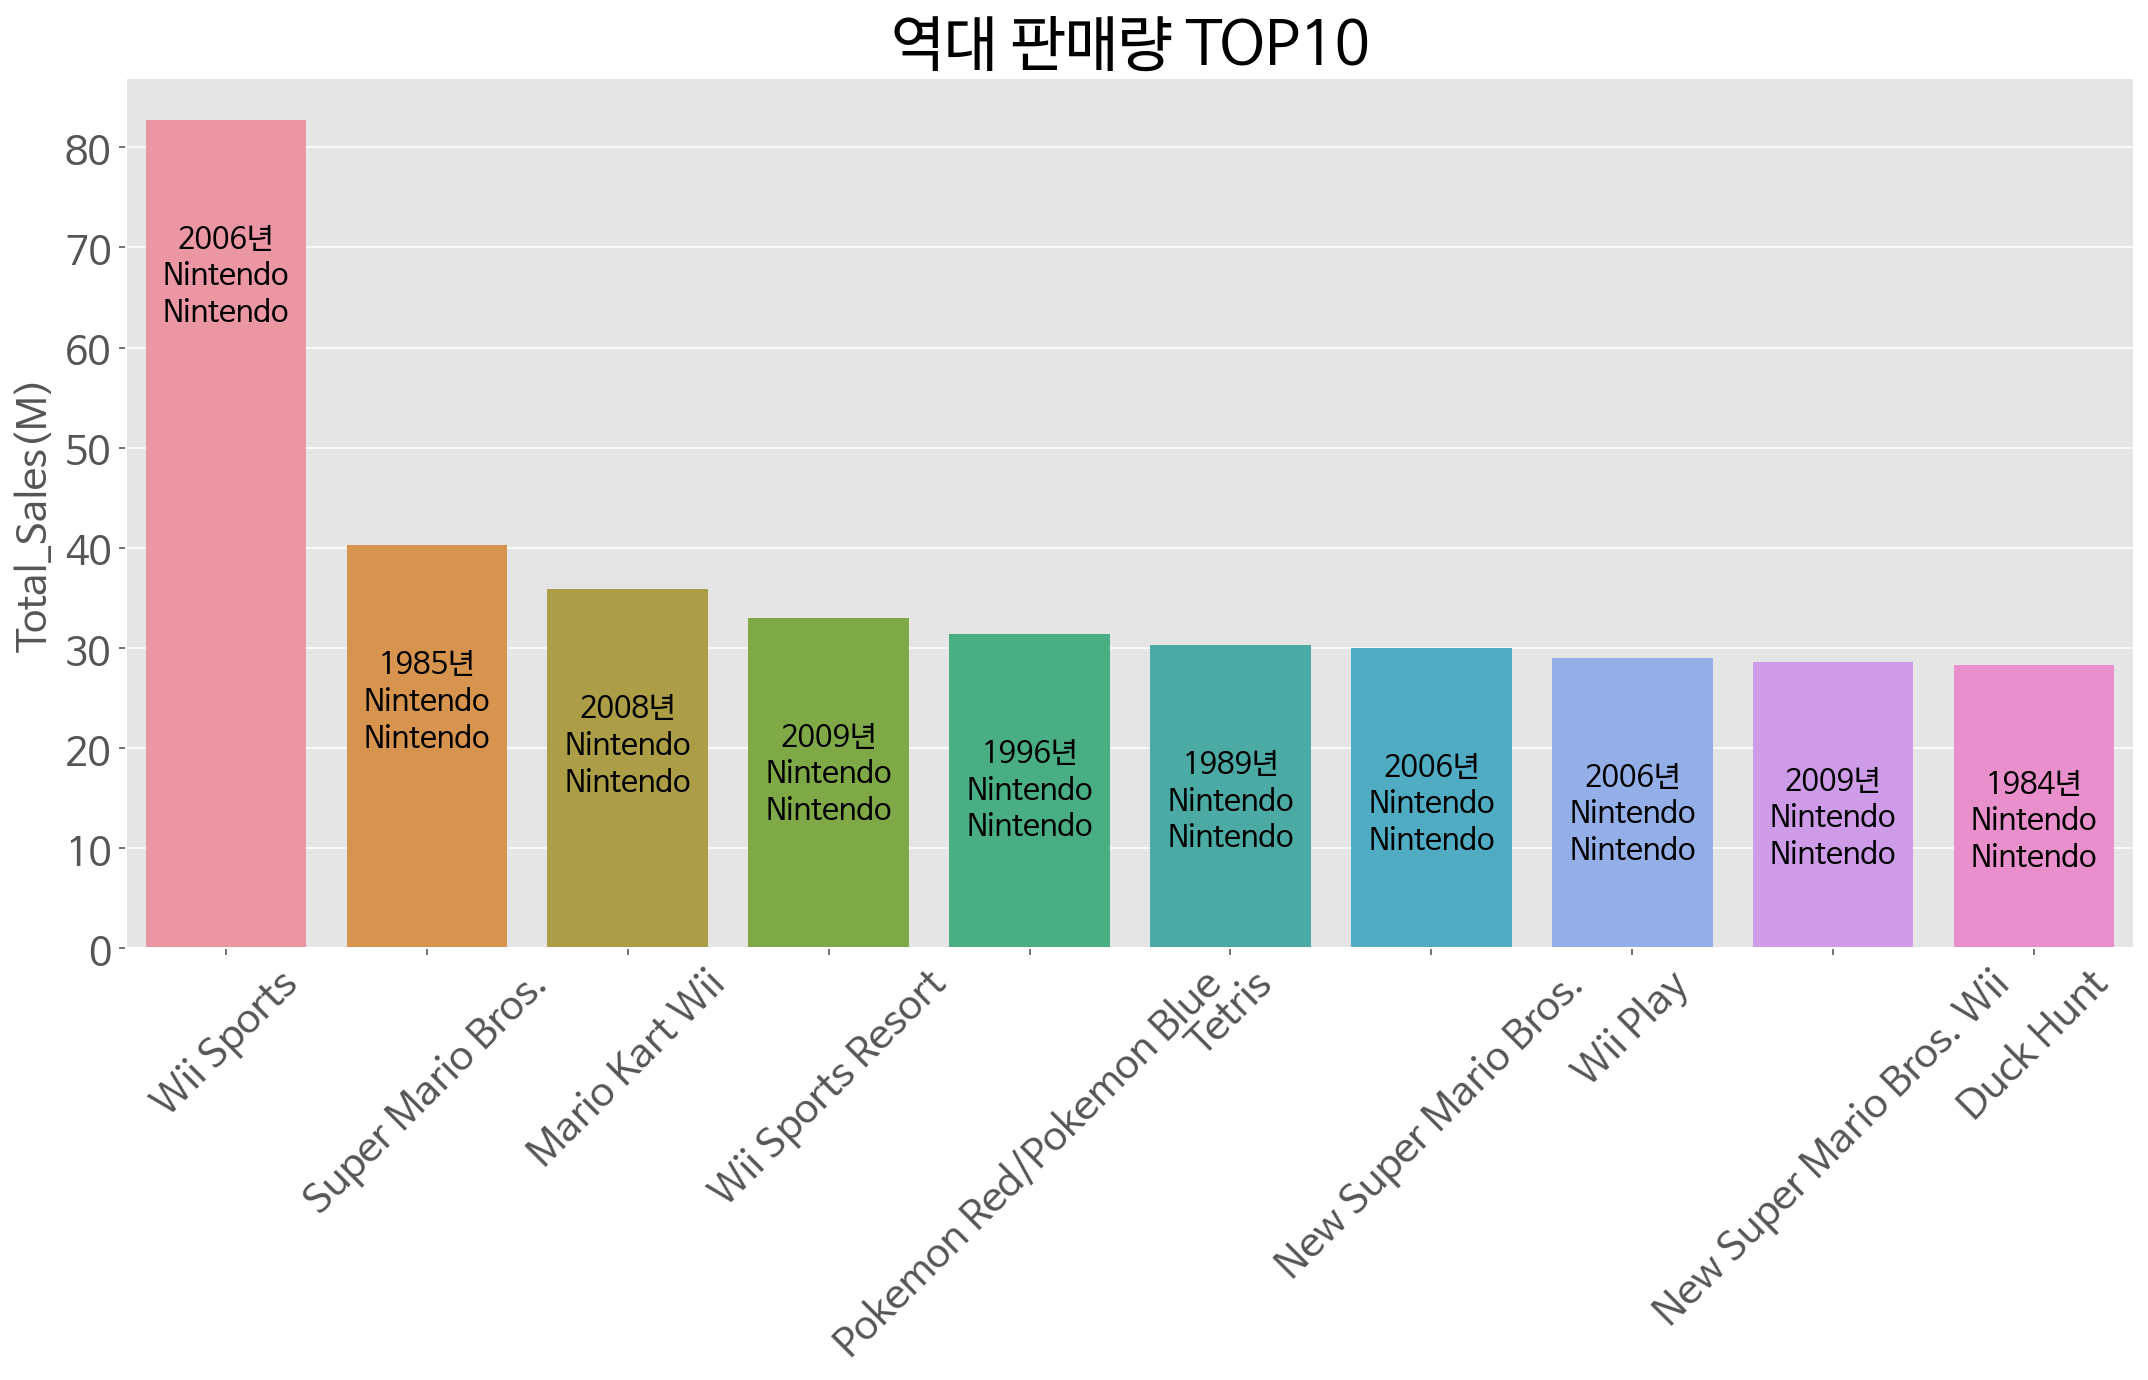

In [168]:
top_sales_10 = games.sort_values(by='Total_Sales', ascending=False).head(10)

plt.figure(figsize=(18,8))
ax = sns.barplot(x='Name', y='Total_Sales', data=top_sales_10)
i = 0

for year, val, platform, publisher in zip(top_sales_10 .Year, top_sales_10 .Total_Sales, 
                                                top_sales_10 .Platform, top_sales_10 .Publisher):
    ax.text(x=i, y=val-20, s=(str(year) + '년' + '\n' + publisher + '\n' + platform), color='black', ha='center', fontsize=15)
    i+=1
plt.title('역대 판매량 TOP10', fontsize=30)
plt.xticks(fontsize=20, rotation=45)
plt.yticks(fontsize=20)
plt.xlabel('')
plt.ylabel('Total_Sales(M)', fontsize=20)
plt.show();

In [153]:
#최근 10년간 출고량 top20
games[games.Year>=2011].sort_values(by='Total_Sales', ascending=False).head(20)

Name     Platform  Year  \
3444                          Grand Theft Auto V  PlayStation  2013   
10784                         Grand Theft Auto V    Microsoft  2013   
2778              Call of Duty: Modern Warfare 3    Microsoft  2011   
1952                         Pokemon X/Pokemon Y     Nintendo  2013   
8958                   Call of Duty: Black Ops 3  PlayStation  2015   
4189                  Call of Duty: Black Ops II  PlayStation  2012   
6315                  Call of Duty: Black Ops II    Microsoft  2012   
13951             Call of Duty: Modern Warfare 3  PlayStation  2011   
10991                               Mario Kart 7     Nintendo  2011   
1989                          Grand Theft Auto V  PlayStation  2014   
4200   Pokemon Omega Ruby/Pokemon Alpha Sapphire     Nintendo  2014   
12475                        Super Mario 3D Land     Nintendo  2011   
220                                 Just Dance 3     Nintendo  2011   
5536                        Call of Duty: Ghosts    Microsoft  2013   
10257                    New Super Mario Bros. 2     Nintendo  2012   
14401                                     Halo 4    Microsoft  2012   
6799                        Call of Duty: Ghosts  PlayStation  2013   
9876                                   Minecraft    Microsoft  2013   
8795                   Animal Crossing: New Leaf     Nintendo  2012   
11385                The Elder Scrolls V: Skyrim    Microsoft  2011   

              Genre               Publisher  NA_Sales  EU_Sales  JP_Sales  \
3444         Action    Take-Two Interactive      7.01      9.27      0.97   
10784        Action    Take-Two Interactive      9.63      5.31      0.06   
2778        Shooter              Activision      9.03      4.28      0.13   
1952   Role-Playing                Nintendo      5.17      4.05      4.34   
8958        Shooter              Activision      5.77      5.81      0.35   
4189        Shooter              Activision      4.99      5.88      0.65   
6315        Shooter              Activision      8.25      4.30      0.07   
13951       Shooter              Activision      5.54      5.82      0.49   
10991        Racing                Nintendo      4.74      3.91      2.67   
1989         Action    Take-Two Interactive      3.80      5.81      0.36   
4200   Role-Playing                Nintendo      4.23      3.37      3.08   
12475      Platform                Nintendo      4.89      2.99      2.13   
220            Misc                 Ubisoft      6.05      3.15      0.00   
5536        Shooter              Activision      6.72      2.63      0.04   
10257      Platform                Nintendo      3.66      3.07      2.47   
14401       Shooter  Microsoft Game Studios      6.63      2.36      0.04   
6799        Shooter              Activision      4.09      3.73      0.38   
9876           Misc  Microsoft Game Studios      5.58      2.83      0.02   
8795     Simulation                Nintendo      2.01      2.32      4.36   
11385  Role-Playing      Bethesda Softworks      5.03      2.86      0.10   

       Other_Sales  Total_Sales  
3444          4.14        21.39  
10784         1.38        16.38  
2778          1.32        14.76  
1952          0.79        14.35  
8958          2.31        14.24  
4189          2.52        14.04  
6315          1.12        13.74  
13951         1.62        13.47  
10991         0.89        12.21  
1989          2.02        11.99  
4200          0.65        11.33  
12475         0.78        10.79  
220           1.07        10.27  
5536          0.82        10.21  
10257         0.63         9.83  
14401         0.73         9.76  
6799          1.38         9.58  
9876          0.77         9.20  
8795          0.41         9.10  
11385         0.85         8.84

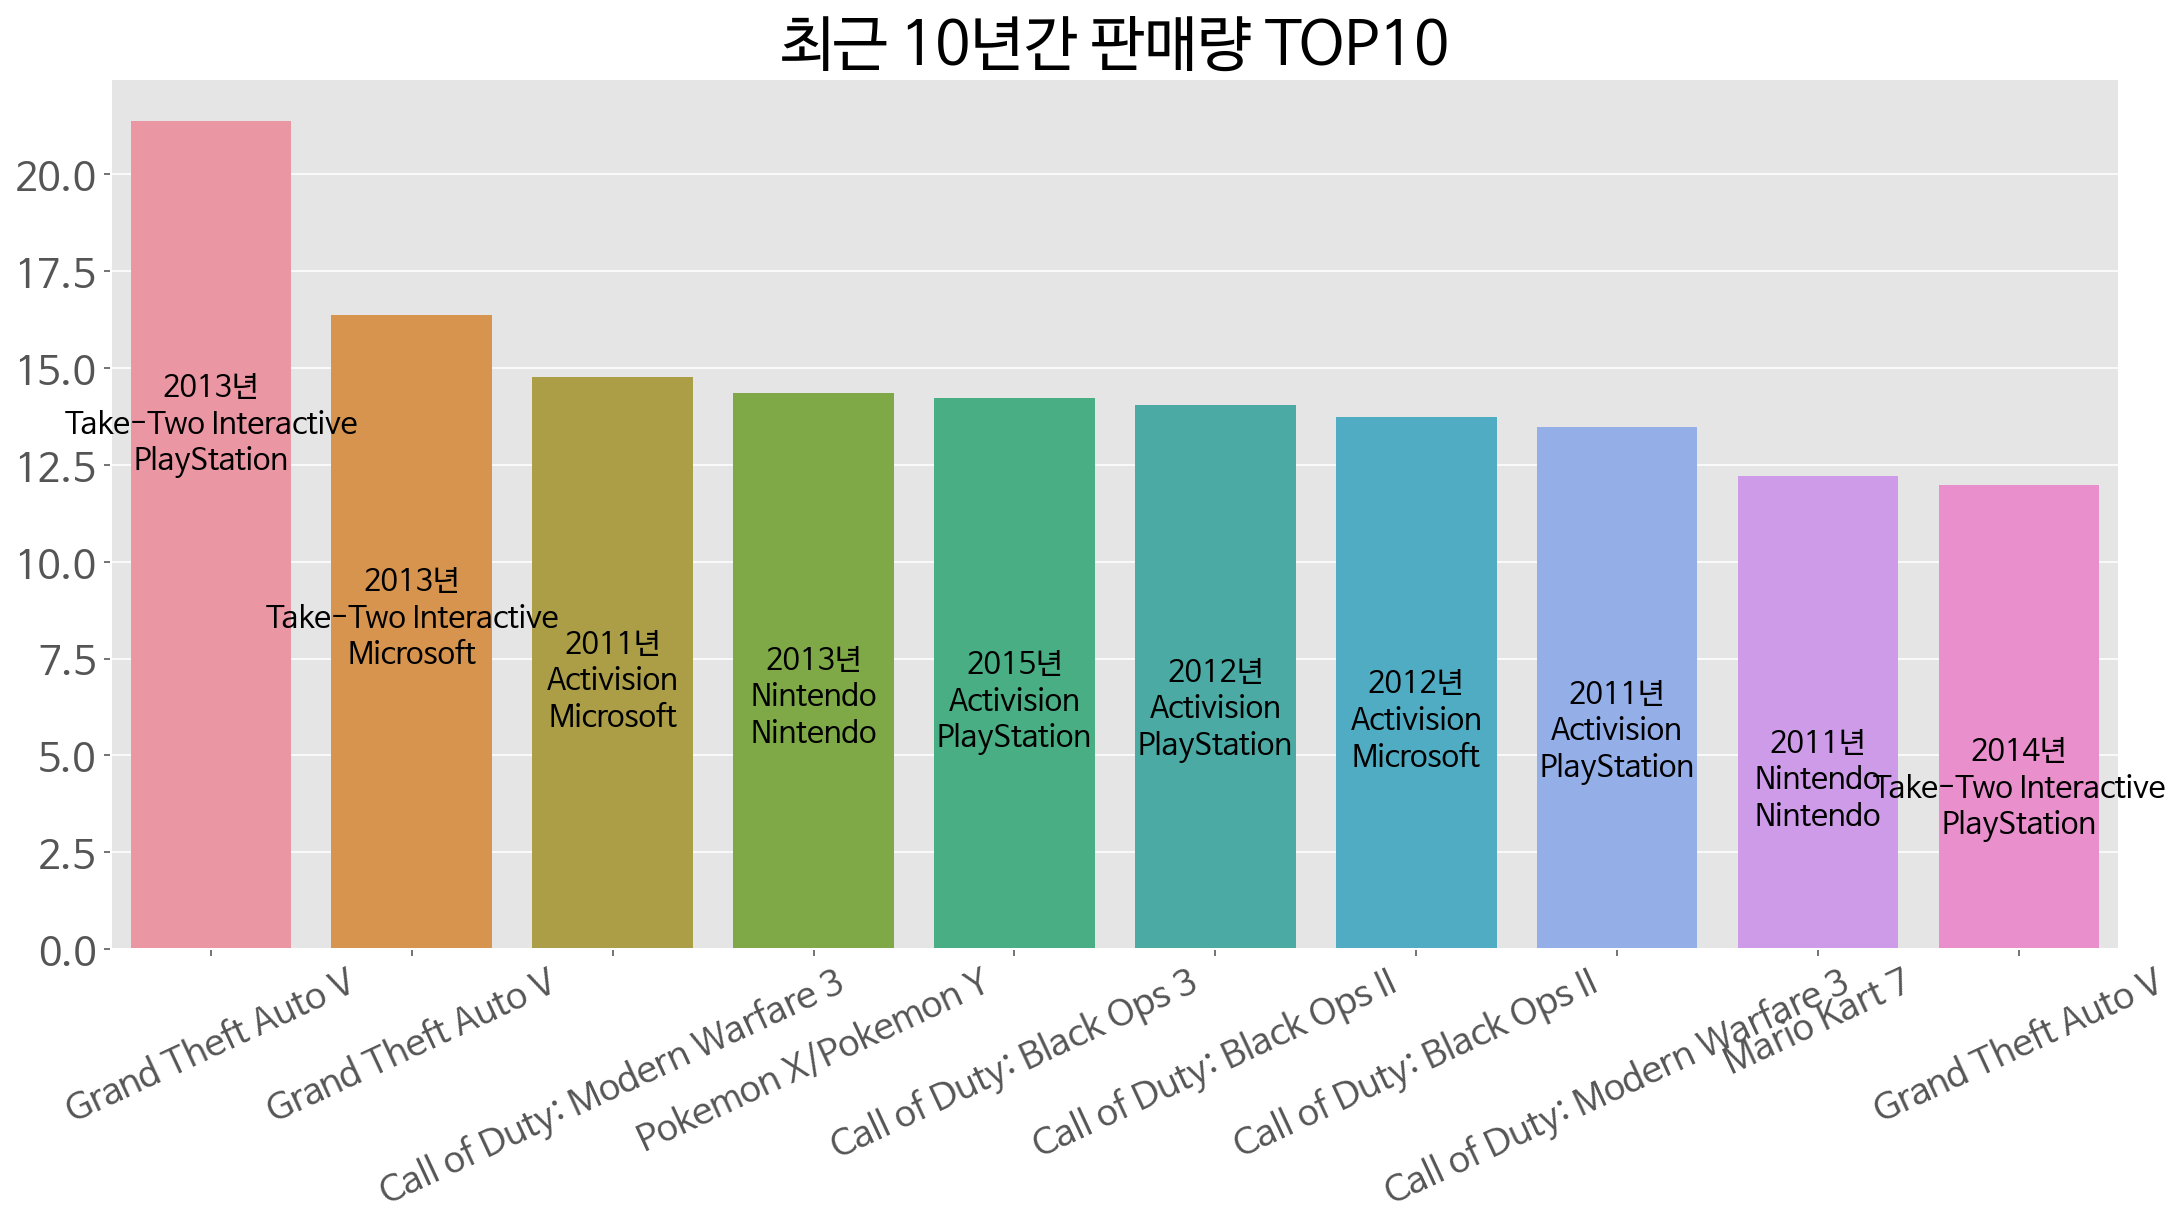

In [166]:
top_sales_10 = games[games.Year>=2011].sort_values(by='Total_Sales', ascending=False).head(10)
ranks = []
for i in range(10):
    ranks.append(f'{i+1}위')
top_sales_10['rank'] = ranks
xticks = top_sales_10.Name.tolist()

plt.figure(figsize=(18, 8))
a = sns.barplot(x='rank', y='Total_Sales', data=top_sales_10)
i = 0
for year, val, platform, publisher in zip(top_sales_10 .Year, top_sales_10 .Total_Sales, 
                                                top_sales_10 .Platform, top_sales_10 .Publisher):
    a.text(x=i, y=val-9, s=(str(year) + '년' + '\n' + publisher + '\n' + platform), color='black', ha='center', fontsize=15)
    i+=1
plt.title('최근 10년간 판매량 TOP10', fontsize=30)
plt.xticks(fontsize=18, rotation=25)
a.set_xticklabels(xticks)
plt.yticks(fontsize=20)
plt.xlabel('')
plt.ylabel('Total_Sales(M)')
plt.tight_layout
plt.show()

## 출고량이 높은 게임의 제작사에는 어떤 특징이 있는가?

-----
## 위의 분석들을 모두 종합해보자면, 
### 액션 장르의 게임을 Activision사에서 제작해,
### 플레이스테이션 플랫폼으로 출시하는 것이 가장 좋아보입니다.